# Importacion de las librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.model_selection import KFold, cross_val_score

# Ploting
import matplotlib.pyplot as plt
import colour

# Redes Neuronales
import tensorflow as tf
from tensorflow import keras
import scikeras

# Scikit learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet,
                                 BayesianRidge)
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from xgboost import XGBRegressor

# Implementacion de tensorboard
# Load the TensorBoard notebook extension
# %load_ext tensorboard
import datetime
import optuna
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error)

from time import perf_counter
# from PIL import Image

# Lectura y procesamiento del Dataset

In [2]:
df = pd.read_csv('df_rgb_xyz.csv').drop('Unnamed: 0',axis=1)
df['R'] = df['R'] / 100
df['DEE'] = df['DEE'] / 80
df_test = df
df = df.drop(['z'], axis=1)
print(df.shape)
df.head()

(24635, 8)


R       DEE    Remb         r         g         b         x  \
0  0.101691  0.891269  0.5481  0.607739  0.607748  0.610636  0.312052   
1  0.249168  0.539952  0.3979  0.614463  0.662313  0.545797  0.326839   
2  0.914374  0.211320  0.6341  0.643678  0.632023  0.563976  0.331315   
3  0.859463  0.568773  0.8010  0.667089  0.649641  0.526636  0.344984   
4  0.311980  0.182830  0.3469  0.752189  0.582688  0.540596  0.369491   

          y  
0  0.327911  
1  0.373410  
2  0.354632  
3  0.374364  
4  0.343779

In [3]:
df.describe()

R           DEE          Remb             r             g  \
count  24635.000000  24635.000000  24635.000000  24635.000000  24635.000000   
mean       0.565423      0.474598      0.657977      0.627914      0.601236   
std        0.284399      0.277197      0.188672      0.080999      0.049293   
min        0.050000      0.062500      0.300000     -0.181064      0.363591   
25%        0.345113      0.233058      0.519609      0.574962      0.575145   
50%        0.560209      0.481660      0.690612      0.630622      0.607490   
75%        0.805104      0.674836      0.775595      0.685156      0.629795   
max        1.000000      1.000000      1.000000      0.880922      0.740896   

                  b             x             y  
count  24635.000000  24635.000000  24635.000000  
mean       0.595498      0.321553      0.330612  
std        0.063144      0.030290      0.036470  
min        0.280018      0.204156      0.221430  
25%        0.565935      0.300711      0.301435  
50%        0.606192      0.321979      0.328984  
75%        0.632683      0.343659      0.351444  
max        0.756195      0.438084      0.464530

In [3]:
from scipy.stats import gaussian_kde

# Suponiendo que 'df' es tu DataFrame y 'columna1' y 'columna2' son las columnas de interés
# Por ejemplo, df podría ser algo como pd.DataFrame({'columna1': [...], 'columna2': [...]})

# Extraer los valores de las dos columnas y formar una matriz 2D
values = np.vstack([df['x'], df['y']])

# Calcular la densidad de KDE
kde = gaussian_kde(values)

# Evaluar la densidad en cada conjunto de puntos
df['densidad'] = kde(values)

# Filtrar basado en la densidad: si deseas eliminar valores con densidades altas, puedes hacer lo siguiente:
# Establecer un umbral para la densidad
umbral = np.percentile(df['densidad'], 65)  # Ajusta el percentil según sea necesario

# Conservar solo los datos que tienen una densidad por debajo del umbral
df_filtrado = df[df['densidad'] < umbral]
df = df_filtrado.drop(['densidad'], axis=1)
df.shape

(16013, 8)

In [3]:
from scipy.stats import gaussian_kde
df_2 = pd.read_csv('Raw_data.csv')
print(df_2.shape)
# Extraer los valores de las dos columnas y formar una matriz 2D
values = np.vstack([df_2['x'], df_2['y']])

# Calcular la densidad de KDE
kde = gaussian_kde(values)

# Evaluar la densidad en cada conjunto de puntos
df_2['densidad'] = kde(values)

# Filtrar basado en la densidad: si deseas eliminar valores con densidades altas, puedes hacer lo siguiente:
# Establecer un umbral para la densidad
umbral = np.percentile(df_2['densidad'], 100)  # Ajusta el percentil según sea necesario

# Conservar solo los datos que tienen una densidad por debajo del umbral
df_filtrado = df_2[df_2['densidad'] < umbral]
df_2 = df_filtrado.drop(['densidad'], axis=1)
print(df_2.shape)
df_2.describe().T

(4620, 5)
(4618, 5)


count        mean        std        min        25%         50%  \
D  4618.0  118.964920  48.452894  38.000000  75.500000  116.000000   
H  4618.0   64.989173  21.603218  30.000000  45.000000   65.000000   
T  4618.0   20.003032   6.324897  10.000000  14.000000   20.000000   
x  4618.0    0.325224   0.057124   0.155837   0.299664    0.324696   
y  4618.0    0.322403   0.059470   0.096718   0.304892    0.325808   

          75%         max  
D  158.000000  200.000000  
H   85.000000  100.000000  
T   26.000000   30.000000  
x    0.352181    0.508707  
y    0.349800    0.459749

In [4]:
df_2['D'] = df_2['D'] / 200
df_2['H'] = df_2['H'] / 100
df_2['T'] = df_2['T'] / 30
df_test_2 = df_2
df_2.head()

D     H         T         x         y
0  0.19  0.30  0.333333  0.344131  0.349242
1  0.19  0.35  0.333333  0.352166  0.360159
2  0.19  0.40  0.333333  0.367040  0.379699
3  0.19  0.45  0.333333  0.387610  0.401142
4  0.19  0.50  0.333333  0.403249  0.401599

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4618 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D       4618 non-null   float64
 1   H       4618 non-null   float64
 2   T       4618 non-null   float64
 3   x       4618 non-null   float64
 4   y       4618 non-null   float64
dtypes: float64(5)
memory usage: 216.5 KB


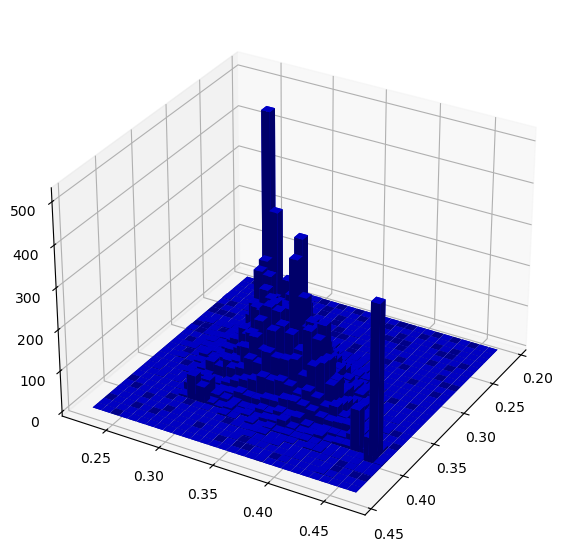

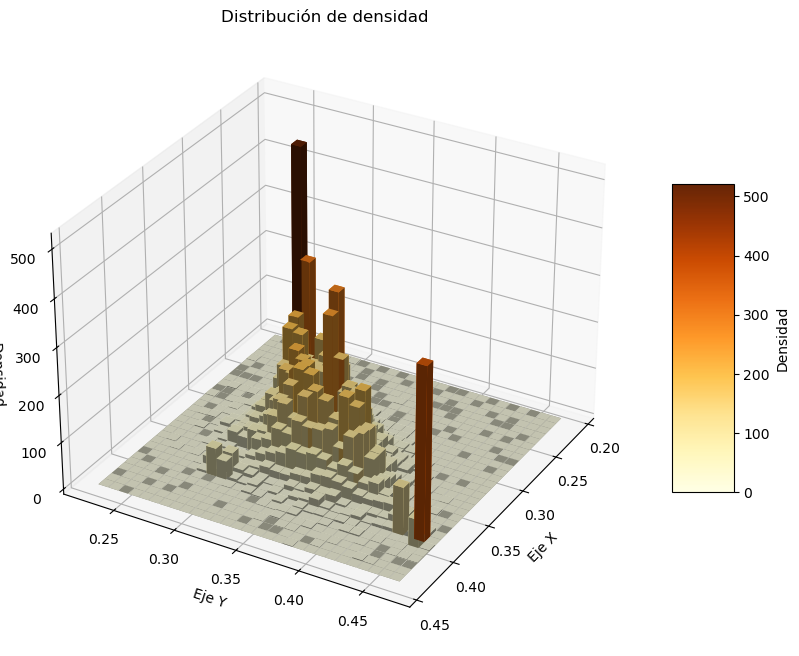

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Supongamos que tienes las siguientes listas o arrays para x e y:
x = df['x']
y = df['y']

# Calcula los puntos de densidad de KDE
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Creamos una malla regular para evaluar la función de KDE
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
zz = gaussian_kde(xy)(np.vstack([xx.flatten(), yy.flatten()]))
zz = zz.reshape(xx.shape)

# Crea la figura y el eje 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Configura los límites para los bins
x_bins = np.linspace(x.min(), x.max(), 30)
y_bins = np.linspace(y.min(), y.max(), 30)

# Calcula el histograma 2D
histogram, xedges, yedges = np.histogram2d(x, y, bins=(x_bins, y_bins))

# Posiciones de las barras
xpos, ypos = np.meshgrid(xedges[:-1] + np.diff(xedges)/2, yedges[:-1] + np.diff(yedges)/2)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Altura de las barras
dz = histogram.flatten()

# Tamaño de las barras
dx = dy = np.ones_like(dz) * (xedges[1] - xedges[0])

# Graficar las barras
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Ajustar la vista
ax.view_init(elev=30, azim=30)
#=============================================================================================
# Altura de las barras
dz = histogram.flatten()

# Tamaño de las barras
dx = dy = np.ones_like(dz) * (xedges[1] - xedges[0])

# Creamos la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Para cambiar el color de las barras basado en la densidad, normalizamos 'dz' y creamos un mapa de colores
norm = Normalize(dz.min(), dz.max())
colors = plt.cm.YlOrBr(norm(dz))

# Graficamos las barras con los colores basados en la densidad
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

# Ajustamos la vista
ax.view_init(elev=30, azim=30)

# Creamos el mappable para la barra de color
mappable = ScalarMappable(norm=norm, cmap='YlOrBr')
mappable.set_array(dz)

# Barra de color para la densidad
color_bar = plt.colorbar(mappable, shrink=0.5, aspect=5, ax=ax)
color_bar.set_label('Densidad')

# Etiquetas de los ejes y título
ax.set_title('Distribución de densidad')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Densidad')

plt.show()

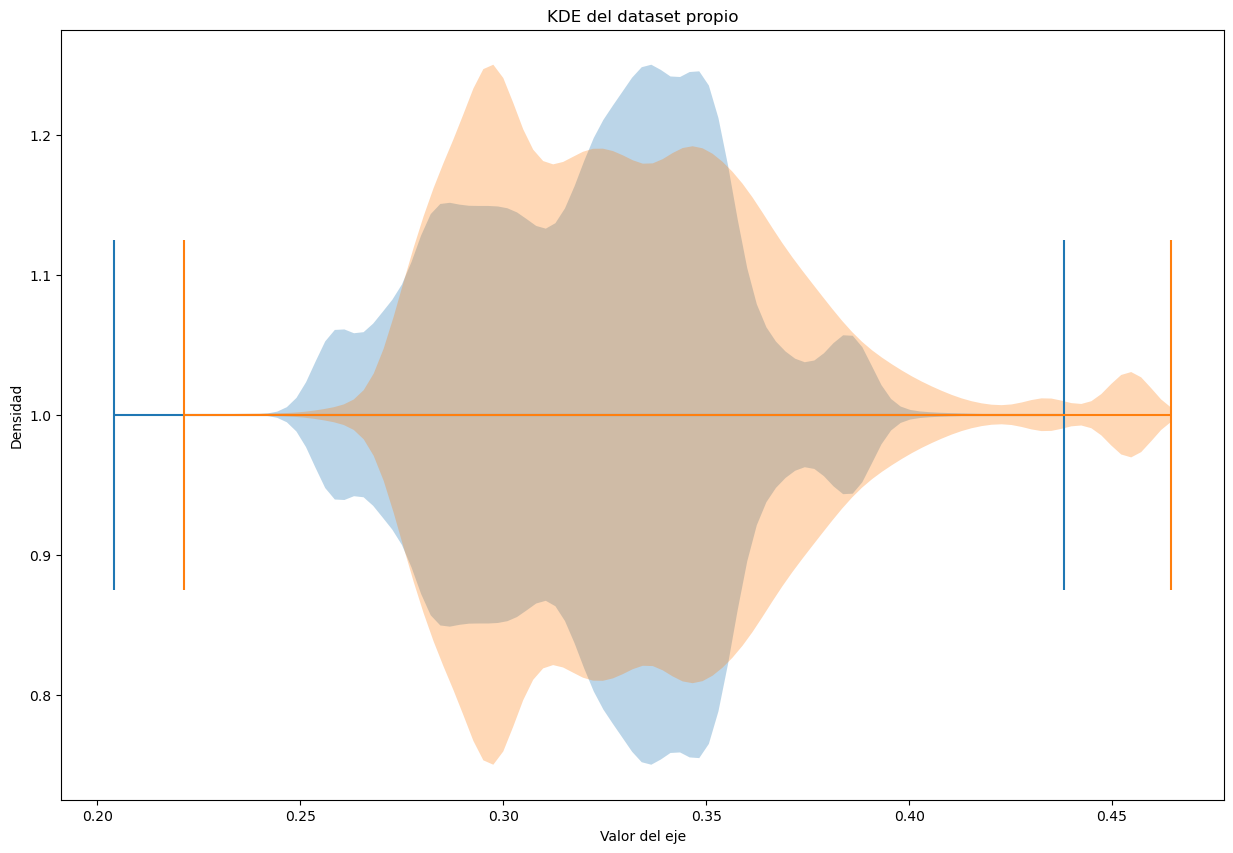

In [8]:
plt.figure(figsize=(15,10))
plt.violinplot(df['x'],vert=False)
plt.violinplot(df['y'],vert=False)
plt.ylabel('Densidad')
plt.xlabel('Valor del eje')
plt.title('KDE del dataset propio')
plt.show()

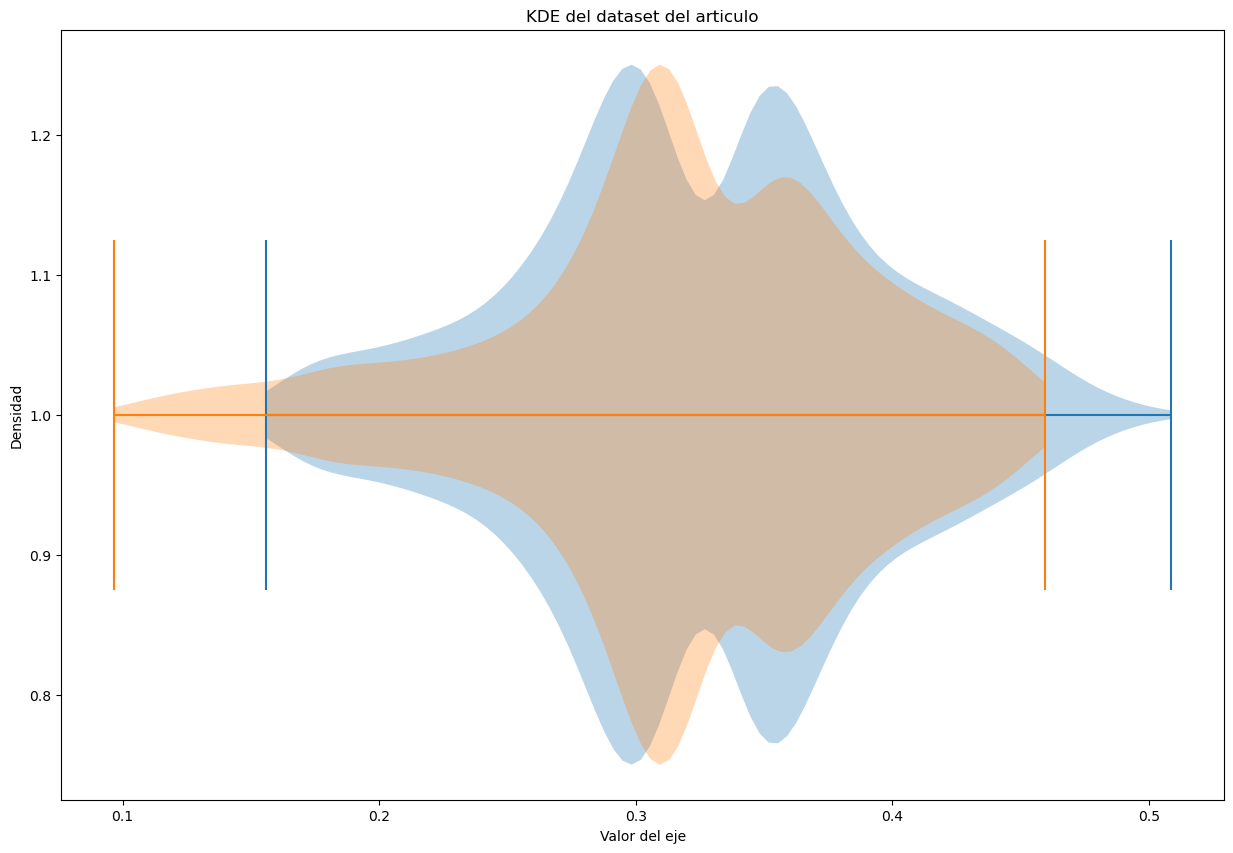

In [9]:
plt.figure(figsize=(15,10))
plt.violinplot(df_2['x'],vert=False)
plt.violinplot(df_2['y'],vert=False)
plt.ylabel('Densidad')
plt.xlabel('Valor del eje')
plt.title('KDE del dataset del articulo')
plt.show()

In [5]:
numero_duplicados = df.duplicated().sum()

if numero_duplicados > 0:
    print(f"Hay {numero_duplicados} filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

Hay 56 filas duplicadas en el DataFrame.


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df = df.drop(df[df['r']==df.r.min()].index[0],axis=0)
df = df.drop(df[df['r']==df.r.min()].index[0],axis=0)
# plt.violinplot(df.r,vert=False)
df.describe().T

count      mean       std       min       25%       50%       75%  \
R     24577.0  0.565412  0.283819  0.050000  0.345268  0.560028  0.803974   
DEE   24577.0  0.474418  0.276595  0.062500  0.233655  0.481486  0.673951   
Remb  24577.0  0.658336  0.188132  0.300000  0.520000  0.690630  0.775500   
r     24577.0  0.627953  0.080788  0.237164  0.574827  0.630769  0.685175   
g     24577.0  0.601178  0.049325  0.363591  0.575097  0.607423  0.629796   
b     24577.0  0.595540  0.063179  0.280018  0.566041  0.606228  0.632765   
x     24577.0  0.321548  0.030298  0.238820  0.300626  0.321979  0.343672   
y     24577.0  0.330573  0.036489  0.221430  0.301340  0.328957  0.351359   

           max  
R     1.000000  
DEE   1.000000  
Remb  1.000000  
r     0.880922  
g     0.740896  
b     0.756195  
x     0.438084  
y     0.464530

# Creacion de los datos de entrenamiento de manera aleatoria

In [8]:
import random
random.seed(a=17)
test = [(random.random(), random.random(), random.random()) for i in range(2000)]
print(len(test))
test = pd.DataFrame(test)
test.columns=['r','g','b']
test

2000


r         g         b
0     0.521984  0.806691  0.960495
1     0.289625  0.766107  0.704220
2     0.661383  0.110162  0.026937
3     0.384171  0.746395  0.252384
4     0.501603  0.317435  0.846328
...        ...       ...       ...
1995  0.165147  0.842233  0.653894
1996  0.199287  0.033740  0.079350
1997  0.227342  0.710840  0.694194
1998  0.819685  0.671013  0.468718
1999  0.275228  0.244656  0.593389

[2000 rows x 3 columns]

In [9]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(df.drop(['R', 'DEE', 'Remb','x','y'],axis=1), df[['R', 'DEE', 'Remb']])

# Prediciendo nuevos datos
predictions = knn.predict(test)
test = pd.DataFrame(predictions)
test.columns=('R','DEE','Remb')
test

R       DEE      Remb
0     0.734497  0.638300  0.456900
1     0.645693  0.569124  0.357100
2     0.775672  0.532375  0.871967
3     0.402796  0.438091  0.522500
4     0.919255  0.896736  0.705899
...        ...       ...       ...
1995  0.645693  0.569124  0.357100
1996  0.919255  0.896736  0.705899
1997  0.645693  0.569124  0.357100
1998  0.374510  0.575196  0.385400
1999  0.919255  0.896736  0.705899

[2000 rows x 3 columns]

In [10]:
test = pd.merge(test, df[['r', 'g', 'b', 'R', 'DEE', 'Remb','x','y']], 
                  on=['R', 'Remb', 'DEE'], 
                  how='left')
test.head()
x_test = test.drop(['R', 'DEE', 'Remb','x','y'],axis=1)
y_test = test[['R', 'DEE', 'Remb']]
test.head()
x_test.shape,y_test.shape

((2000, 3), (2000, 3))

In [11]:
# Unir df1 con df2 usando un 'inner' merge
merged_df = test.merge(df, how='inner')

# Verificar si todas las filas de df1 están en df2
all_rows_present = len(merged_df) == len(test)
all_rows_present

True

# Sustracion de los datos de entramiento del df original

In [12]:
# Concatenar df1 y df2
concatenated = pd.concat([test, df])

# Eliminar duplicados, manteniendo la primera ocurrencia (es decir, las filas de df1)
concatenated_unique = concatenated.drop_duplicates(keep='first')

# Eliminar las filas que estaban en df1 para obtener el df2 limpio
df = concatenated_unique[~concatenated_unique.index.isin(test.index)]
df.shape

(22255, 8)

In [13]:
df.shape, test.shape

((22255, 8), (2000, 8))

In [14]:
# combined_df = pd.concat([test, df])
# filtered_df = combined_df.drop_duplicates(subset=test.columns.tolist(), keep='last')

# Conserva solo las filas que originalmente estaban en df
# df = filtered_df.iloc[len(test):]
x_df = df.drop(['R', 'DEE', 'Remb','x','y'],axis=1)
y_df = df[['R', 'DEE', 'Remb']] 

In [15]:
x_df.shape, y_df.shape

((22255, 3), (22255, 3))

# Ubicacion de las muestras en el espacio de color CIIE 1931

In [16]:
import colour
df_test = pd.merge(test, df_test[['R', 'DEE', 'Remb']], 
                  on=['R', 'Remb', 'DEE'], 
                  how='left')
test.head()

# Define your scatter plot points (CIE xy coordinates)
x = df_test['x']
y = df_test['y']

# Plot the CIE 1931 Chromaticity Diagram
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)

# Scatter plot of your points
plt.scatter(x, y, c='black')
# Show the plot
plt.show()

C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028
C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028
C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: "standalone" argument has been renamed to "sho

In [17]:
x2_df = df[['x', 'y']]
y2_df = df[['R','DEE','Remb']]
x2_test = df_test[['x', 'y']]
y2_test = df_test[['R','DEE','Remb']]

# Entrenamiento de los modelos

In [20]:
# Creación de listas para el guardado de los resultados de cada entrenamiento
Model = []
NMSE = []
NMAE = []
cv = KFold(10)

# Guardado de los resultados del entrenamiento del algoritmo 
def input_scores(name, model, x, y):
    Model.append(name)
    NMSE.append(cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error').mean())
    NMAE.append(cross_val_score(model, x, y, cv=cv, scoring='neg_mean_absolute_error').mean())

names = ['Linear Regression', 'Lasso Regression', 
         'ElasticNet Regression', 'SVR', 'Gaussian Regressor', 'Bayesian Ridge',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor','XGBoost']

models = [LinearRegression(), Lasso(), ElasticNet(),
          SVR(), GaussianProcessRegressor(), BayesianRidge(),
          KNeighborsRegressor(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor(), XGBRegressor()]

# Entrenamiento de cada modelo de la lista "models" a lo fuerza bruta
for name, model in zip(names, models):
    wrapped_model = MultiOutputRegressor(model)
    input_scores(name, wrapped_model, x_df, y_df)

# Creación de un dataframe a partir de la información recolectada
evaluation = pd.DataFrame({'Model': Model,
                           'MSE' : NMSE})
evaluation

Model       MSE
0             Linear Regression -0.072969
1              Lasso Regression -0.068690
2         ElasticNet Regression -0.068690
3                           SVR -0.058347
4            Gaussian Regressor -0.064954
5                Bayesian Ridge -0.072919
6         K Neighbors Regressor -0.056257
7       Decision Tree Regressor -0.090958
8       Random Forest Regressor -0.055860
9   Gradient Boosting Regressor -0.051172
10           Adaboost Regressor -0.055538
11                      XGBoost -0.052037

## KNNR Multivariable

In [45]:
def objective(trial):
    
    # Definición de hiperparámetros a optimizar
    n_neighbors = trial.suggest_int('n_neighbors', 2, 40)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan', 'chebyshev'])
    p = 2 if metric != 'minkowski' else trial.suggest_int('p', 1, 5)  # 'p' sólo es relevante para la métrica 'minkowski'
    metric_params = None if metric != 'wminkowski' else {'w': trial.suggest_float('w', 0.0, 1.0)}  # 'w' sólo es relevante para 'wminkowski'
    
    # Creación del modelo con los hiperparámetros sugeridos
    model_knn = KNeighborsRegressor(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric,
        p=p,
        metric_params=metric_params
    )
    
    # Se utiliza la validación cruzada para evaluar el rendimiento del modelo
    return cross_val_score(model_knn,x_df, y_df, n_jobs=-1, cv=10, scoring='neg_mean_absolute_error').mean()

# Crear un estudio de Optuna y optimizar el estudio
study = optuna.create_study(direction='maximize')  # Maximizar porque estamos usando 'neg_mean_squared_error'
study.optimize(objective, n_trials=100)

# Resultados de la optimización
print(f"Valor óptimo de neg_mean_squared_error: {study.best_value}")
print(f"Mejores hiperparámetros: {study.best_params}")


[I 2023-11-06 08:50:53,638] A new study created in memory with name: no-name-c641f2b7-2f9e-4463-aa44-0980254c9b3f
[I 2023-11-06 08:50:55,663] Trial 0 finished with value: -0.17651079214962387 and parameters: {'n_neighbors': 39, 'weights': 'distance', 'metric': 'chebyshev'}. Best is trial 0 with value: -0.17651079214962387.
[I 2023-11-06 08:50:56,799] Trial 1 finished with value: -0.17689875395625007 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'metric': 'chebyshev'}. Best is trial 0 with value: -0.17651079214962387.
[I 2023-11-06 08:50:57,913] Trial 2 finished with value: -0.17715293972439178 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: -0.17651079214962387.
[I 2023-11-06 08:50:58,804] Trial 3 finished with value: -0.17667443670098226 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: -0.17651079214962387.
[I 2023-11-06 08:50:58,867] Trial 4 finishe

[I 2023-11-06 08:51:01,343] Trial 39 finished with value: -0.1932665832477221 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'minkowski', 'p': 5}. Best is trial 8 with value: -0.17633993586100855.
[I 2023-11-06 08:51:01,415] Trial 40 finished with value: -0.17641430123082608 and parameters: {'n_neighbors': 38, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 8 with value: -0.17633993586100855.
[I 2023-11-06 08:51:01,489] Trial 41 finished with value: -0.17633993586100855 and parameters: {'n_neighbors': 40, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 8 with value: -0.17633993586100855.
[I 2023-11-06 08:51:01,562] Trial 42 finished with value: -0.1764110966382111 and parameters: {'n_neighbors': 39, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 8 with value: -0.17633993586100855.
[I 2023-11-06 08:51:01,646] Trial 43 finished with value: -0.17649549184144545 and parameters: {'n_neighbors': 36, 'weights': 'distance', 'metric':

[I 2023-11-06 08:51:04,218] Trial 78 finished with value: -0.17632011818547227 and parameters: {'n_neighbors': 37, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 44 with value: -0.17609216667804514.
[I 2023-11-06 08:51:04,288] Trial 79 finished with value: -0.1764302078579253 and parameters: {'n_neighbors': 35, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 44 with value: -0.17609216667804514.
[I 2023-11-06 08:51:04,358] Trial 80 finished with value: -0.1766209267655941 and parameters: {'n_neighbors': 32, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 44 with value: -0.17609216667804514.
[I 2023-11-06 08:51:04,429] Trial 81 finished with value: -0.17632011818547227 and parameters: {'n_neighbors': 37, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 44 with value: -0.17609216667804514.
[I 2023-11-06 08:51:04,500] Trial 82 finished with value: -0.17649834841160242 and parameters: {'n_neighbors': 34, 'weights': 'distance', 'metric': 'm

Valor óptimo de neg_mean_squared_error: -0.17609216667804514
Mejores hiperparámetros: {'n_neighbors': 40, 'weights': 'distance', 'metric': 'manhattan'}


In [46]:
knn_m = KNeighborsRegressor(n_neighbors=40, weights='distance', metric='manhattan',)
knn_m.fit(x_df , y_df)


KNeighborsRegressor(metric='manhattan', n_neighbors=40, weights='distance')

In [79]:
knn_pred = knn_m.predict(x_test)
mse_knn = mean_squared_error(y_test, knn_pred)
print(mse_knn)

0.0566591645384


## Gradient Boosting

In [67]:
#Busqueda de hiperparametros para GradientBooost
def objective_gbr(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 8)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 8)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 8)
    model =  MultiOutputRegressor(GradientBoostingRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    ))
    model.fit(x_df, y_df)
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test, y_pred)

study_gbr = optuna.create_study(direction='minimize')
study_gbr.optimize(objective_gbr, n_trials=100)

[I 2023-11-06 09:08:21,996] A new study created in memory with name: no-name-b8c68f32-4859-4ad5-ad90-82c7f622af0d
[I 2023-11-06 09:08:44,220] Trial 0 finished with value: 0.052515332833364965 and parameters: {'n_estimators': 216, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.052515332833364965.
[I 2023-11-06 09:09:49,922] Trial 1 finished with value: 0.06363323696564505 and parameters: {'n_estimators': 216, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.052515332833364965.
[I 2023-11-06 09:10:30,994] Trial 2 finished with value: 0.06453676652610153 and parameters: {'n_estimators': 136, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.052515332833364965.
[I 2023-11-06 09:11:50,293] Trial 3 finished with value: 0.0683351694194652 and parameters: {'n_estimators': 197, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 0 with

[I 2023-11-06 09:25:00,945] Trial 36 finished with value: 0.05593468558555855 and parameters: {'n_estimators': 67, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 35 with value: 0.04732734208210276.
[I 2023-11-06 09:25:26,466] Trial 37 finished with value: 0.058303125769004295 and parameters: {'n_estimators': 125, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 35 with value: 0.04732734208210276.
[I 2023-11-06 09:26:05,114] Trial 38 finished with value: 0.06535003873420865 and parameters: {'n_estimators': 152, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 35 with value: 0.04732734208210276.
[I 2023-11-06 09:26:31,675] Trial 39 finished with value: 0.05609625895301037 and parameters: {'n_estimators': 173, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 35 with value: 0.04732734208210276.
[I 2023-11-06 09:26:52,652] Trial 40 finished with value: 0.05138917680320293 an

[I 2023-11-06 09:32:07,264] Trial 72 finished with value: 0.04630293066615449 and parameters: {'n_estimators': 56, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 71 with value: 0.045810778326513445.
[I 2023-11-06 09:32:13,070] Trial 73 finished with value: 0.046302930666154506 and parameters: {'n_estimators': 56, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 71 with value: 0.045810778326513445.
[I 2023-11-06 09:32:18,968] Trial 74 finished with value: 0.046207108061812774 and parameters: {'n_estimators': 57, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 71 with value: 0.045810778326513445.
[I 2023-11-06 09:32:26,804] Trial 75 finished with value: 0.05211933421122807 and parameters: {'n_estimators': 51, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 71 with value: 0.045810778326513445.
[I 2023-11-06 09:32:51,527] Trial 76 finished with value: 0.05237456892555876 

In [75]:
model_gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators = 65,
                                                       max_depth = 2,
                                                       min_samples_split = 5,
                                                       min_samples_leaf = 7))
model_gbr.fit(x_df, y_df)

y_pred_gbr = model_gbr.predict(x_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mse_gbr

0.045655785422287674

## XGBoost

In [43]:
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 2, 8)
    gamma = trial.suggest_float('gamma', 0.0, 0.5, step=0.1)
    model =  MultiOutputRegressor(XGBRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        gamma=gamma
    ))
    model.fit(x_df, y_df)
    y_pred = model.predict(x_test)
    return mean_squared_error(y_test, y_pred)

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100)

[I 2023-11-06 08:48:20,779] A new study created in memory with name: no-name-09e49e24-3152-4f97-8b09-63c3b7c87254
[I 2023-11-06 08:48:21,024] Trial 0 finished with value: 0.05378792107613322 and parameters: {'n_estimators': 224, 'max_depth': 6, 'gamma': 0.5}. Best is trial 0 with value: 0.05378792107613322.
[I 2023-11-06 08:48:21,176] Trial 1 finished with value: 0.057164962733397016 and parameters: {'n_estimators': 114, 'max_depth': 8, 'gamma': 0.5}. Best is trial 0 with value: 0.05378792107613322.
[I 2023-11-06 08:48:21,464] Trial 2 finished with value: 0.058195287061275726 and parameters: {'n_estimators': 259, 'max_depth': 6, 'gamma': 0.1}. Best is trial 0 with value: 0.05378792107613322.
[I 2023-11-06 08:48:21,757] Trial 3 finished with value: 0.057913601915384715 and parameters: {'n_estimators': 268, 'max_depth': 8, 'gamma': 0.4}. Best is trial 0 with value: 0.05378792107613322.
[I 2023-11-06 08:48:21,889] Trial 4 finished with value: 0.05433770159615662 and parameters: {'n_estima

[I 2023-11-06 08:48:29,916] Trial 41 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 250, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:30,214] Trial 42 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 265, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:30,531] Trial 43 finished with value: 0.057224898107797684 and parameters: {'n_estimators': 283, 'max_depth': 3, 'gamma': 0.5}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:30,671] Trial 44 finished with value: 0.047054789691425215 and parameters: {'n_estimators': 87, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:30,928] Trial 45 finished with value: 0.052539323622002 and parameters: {'n_estimators': 208, 'max_depth': 6, 'gamma': 0.30000000000000004}. Best is trial 19 with value: 0.0470547875068

[I 2023-11-06 08:48:40,983] Trial 82 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 213, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:41,259] Trial 83 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 238, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:41,476] Trial 84 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 166, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:41,790] Trial 85 finished with value: 0.057636289248645195 and parameters: {'n_estimators': 279, 'max_depth': 3, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 2023-11-06 08:48:42,070] Trial 86 finished with value: 0.047054787506811045 and parameters: {'n_estimators': 243, 'max_depth': 2, 'gamma': 0.4}. Best is trial 19 with value: 0.047054787506811045.
[I 20

In [76]:
model_xgb = MultiOutputRegressor(XGBRegressor(n_estimators = 88,
                                             max_depth = 2,
                                             gamma = 0.4))
model_xgb.fit(x_df, y_df)

y_pred_xgb = model_xgb.predict(x_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_xgb

0.047054789654397612

In [80]:
models_scikit = pd.DataFrame({'Model': ['KNN', 'GBR', 'XGBR'],
                           'MSE' : [mse_knn, mse_gbr, mse_xgb]})
models_scikit

Model       MSE
0   KNN  0.056659
1   GBR  0.045656
2  XGBR  0.047055

# TensorFlow

## Modelo de referencia

### CIE XY

In [33]:
model_ref_2_ins = keras.Sequential([
    keras.layers.Dense(950, input_shape = (2,), activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(3)
])

model_ref_2_ins.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanSquaredError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=150, mode='min' ,restore_best_weights=True)

history_model_ref_2_ins = model_ref_2_ins.fit(x2_df,  y2_df, epochs=5000, validation_data=(x2_test, y2_test), callbacks=[callback])

model_ref_2_ins.evaluate(x2_test, y2_test)

Epoch 1/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0654 - mean_squared_error: 0.0654 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 2/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 3/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0676 - val_mean_squared_error: 0.0676
Epoch 4/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0740 - val_mean_squared_error: 0.0740
Epoch 5/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0560 - mean_squared_error: 0.0560 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 6/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 7/5000
731

Epoch 51/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 52/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 53/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 54/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 55/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0607 - val_mean_squared_error: 0.0607
Epoch 56/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0454 - mean_squared_error: 0.0454 - val_loss: 0.0541 - val_mean_squared_error: 0.0541
Epoch 57/5

731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 150/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 151/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0551 - val_mean_squared_error: 0.0551
Epoch 152/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 153/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 154/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 155/5000
731/

[0.042460959404706955, 0.042460959404706955]

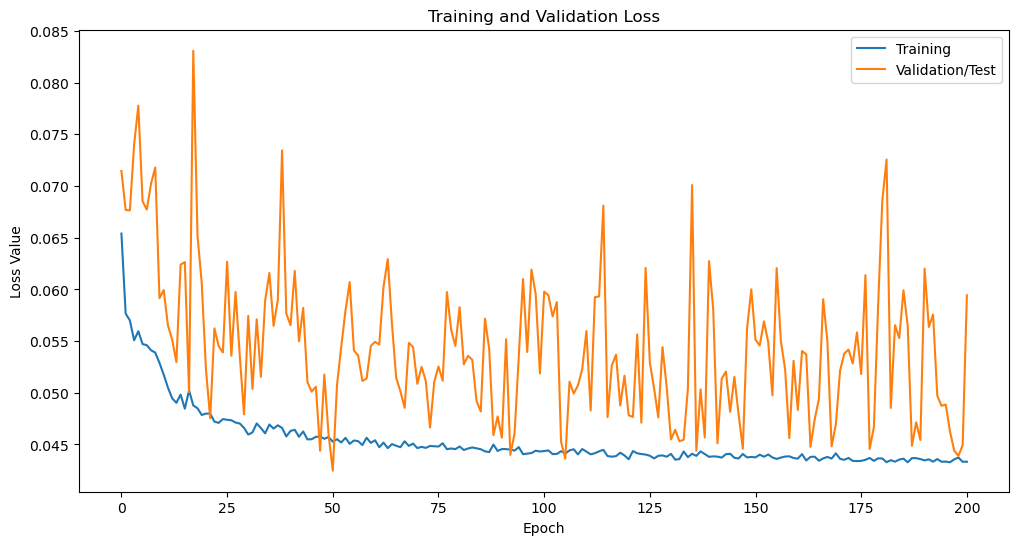

In [34]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_2_ins.history['mean_squared_error'], label='Training')
plt.plot(history_model_ref_2_ins.history['val_mean_squared_error'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

### sRGB

In [355]:
model_ref_3_ins = keras.Sequential([
    keras.layers.Dense(950, input_shape = (3,), activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(3)
])

model_ref_3_ins.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanSquaredError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=150, mode='min' ,restore_best_weights=True)

history_model_ref_3_ins = model_ref_3_ins.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

model_ref_3_ins.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 8s 10ms/step - loss: 0.0624 - mean_squared_error: 0.0624 - val_loss: 0.0712 - val_mean_squared_error: 0.0712
Epoch 2/5000
731/731 [==============================] - 7s 9ms/step - loss: 0.0558 - mean_squared_error: 0.0558 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 3/5000
731/731 [==============================] - 5s 8ms/step - loss: 0.0549 - mean_squared_error: 0.0549 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 4/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0531 - mean_squared_error: 0.0531 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 5/5000
731/731 [==============================] - 6s 8ms/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 6/5000
731/731 [==============================] - 7s 9ms/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 7/5000
73

Epoch 51/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 52/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 53/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0588 - val_mean_squared_error: 0.0588
Epoch 54/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 55/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 56/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 57/5

731/731 [==============================] - 5s 7ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 150/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 151/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0784 - val_mean_squared_error: 0.0784
Epoch 152/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0722 - val_mean_squared_error: 0.0722
Epoch 153/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0563 - val_mean_squared_error: 0.0563
Epoch 154/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 155/5000
731/

731/731 [==============================] - 5s 7ms/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 248/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 249/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 250/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0562 - val_mean_squared_error: 0.0562
Epoch 251/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 252/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0649 - val_mean_squared_error: 0.0649
Epoch 253/5000
731/

731/731 [==============================] - 5s 7ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 346/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 347/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 348/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 349/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 350/5000
731/731 [==============================] - 5s 7ms/step - loss: 0.0421 - mean_squared_error: 0.0421 - val_loss: 0.0598 - val_mean_squared_error: 0.0598
Epoch 351/5000
731/

[0.033210527151823044, 0.033210527151823044]

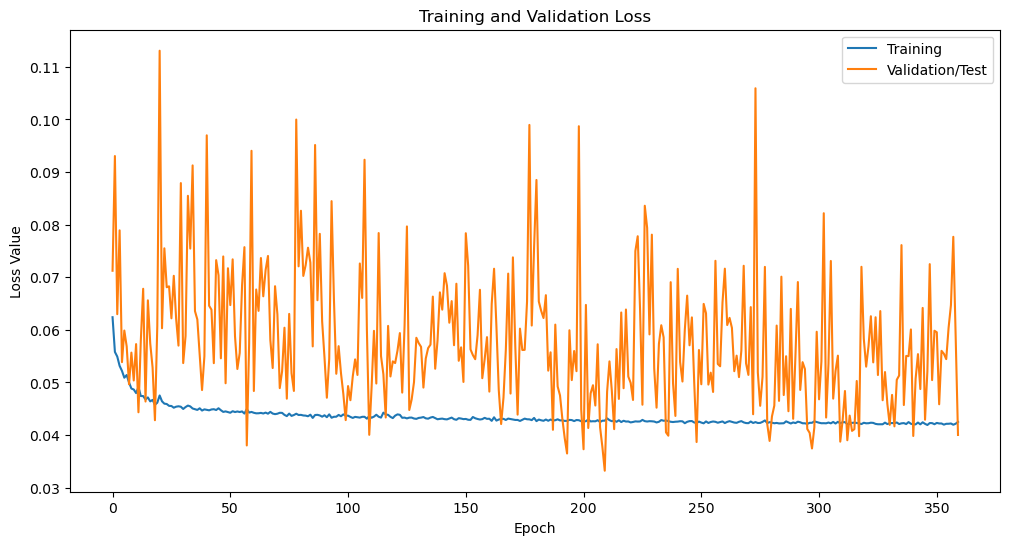

In [356]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_3_ins.history['mean_squared_error'], label='Training')
plt.plot(history_model_ref_3_ins.history['val_mean_squared_error'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

## Busqueda de hiperparametros

In [354]:
# Define el modelo dentro de una función que tomará los hiperparámetros como argumentos
def create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6,
    init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type, optimizer):
    
    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None
        
    
    model = keras.Sequential([
        keras.layers.Dense(1024, input_shape=(3,), activation=activation_1, kernel_initializer=init_mode_1, kernel_regularizer = regularizer),
        keras.layers.Dense(512, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dense(256, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(128, activation=activation_4, kernel_initializer=init_mode_4),
        keras.layers.Dense(64, activation=activation_5, kernel_initializer=init_mode_5),
        keras.layers.Dense(32, activation=activation_6, kernel_initializer=init_mode_6),
#         keras.layers.Dense(neuron_7, activation=activation_7, kernel_initializer=init_mode_7),
#         keras.layers.Dense(neuron_8, activation=activation_8, kernel_initializer=init_mode_8),
#         keras.layers.Dense(4, activation=activation_9, kernel_initializer=init_mode_9),
        keras.layers.Dense(3)
    ])
    model.compile(optimizer= optimizer,
                  loss=keras.losses.MeanSquaredError(),
                  metrics=[keras.metrics.MeanSquaredError(),])
    return model

# Función objetivo para Optuna
def objective(trial):
#     neuron_1 = trial.suggest_int('neuron_1', 3, 1024)
#     neuron_2 = trial.suggest_int('neuron_2', 3, 1024)
#     neuron_3 = trial.suggest_int('neuron_3', 3, 1024)
#     neuron_4 = trial.suggest_int('neuron_4', 3, 1024)
#     neuron_5 = trial.suggest_int('neuron_5', 3, 1024)
#     neuron_6 = trial.suggest_int('neuron_6', 3, 1024)
#     neuron_7 = trial.suggest_int('neuron_6', 3, 1024)
#     neuron_8 = trial.suggest_int('neuron_6', 3, 1024)
    
    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)
    activation_4 = trial.suggest_categorical('activation_4', activations_list)
    activation_5 = trial.suggest_categorical('activation_5', activations_list)
    activation_6 = trial.suggest_categorical('activation_6', activations_list)
#     activation_7 = trial.suggest_categorical('activation_7', activations_list)
#     activation_8 = trial.suggest_categorical('activation_8', activations_list)
#     activation_9 = trial.suggest_categorical('activation_9', activations_list)
    
    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)
    init_mode_4 = trial.suggest_categorical('init_mode_4', init_list)
    init_mode_5 = trial.suggest_categorical('init_mode_5', init_list)
    init_mode_6 = trial.suggest_categorical('init_mode_6', init_list)
#     init_mode_7 = trial.suggest_categorical('init_mode_7', init_list)
#     init_mode_8 = trial.suggest_categorical('init_mode_8', init_list)
#     init_mode_9 = trial.suggest_categorical('init_mode_9', init_list)
    
    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])
    
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop'])
    
    model = create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6,
    init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, regularizer_type, optimizer)
    
    history = model.fit(x_df, y_df, epochs=10, validation_data=(x_test, y_test), verbose=0)
    
    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_mean_squared_error'][-1]
    return val_loss

# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)


[I 2023-11-09 14:40:05,387] A new study created in memory with name: no-name-1f1ecd2e-a428-44f9-906c-499d96e79bc5
[I 2023-11-09 14:40:40,955] Trial 0 finished with value: 0.05078951641917229 and parameters: {'activation_1': 'softplus', 'activation_2': 'linear', 'activation_3': 'selu', 'activation_4': 'swish', 'activation_5': 'softmax', 'activation_6': 'exponential', 'init_mode_1': 'zero', 'init_mode_2': 'zero', 'init_mode_3': 'uniform', 'init_mode_4': 'normal', 'init_mode_5': 'uniform', 'init_mode_6': 'lecun_uniform', 'regularizer_type': 'l2', 'optimizer': 'Adam'}. Best is trial 0 with value: 0.05078951641917229.
[I 2023-11-09 14:41:12,559] Trial 1 finished with value: 0.051626354455947876 and parameters: {'activation_1': 'selu', 'activation_2': 'exponential', 'activation_3': 'selu', 'activation_4': 'relu', 'activation_5': 'linear', 'activation_6': 'exponential', 'init_mode_1': 'uniform', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'glorot_uniform', 'init_mode_4': 'lecun_uniform', '

[I 2023-11-09 14:53:07,222] Trial 16 finished with value: 0.06786269694566727 and parameters: {'activation_1': 'hard_sigmoid', 'activation_2': 'softmax', 'activation_3': 'linear', 'activation_4': 'linear', 'activation_5': 'swish', 'activation_6': 'linear', 'init_mode_1': 'he_normal', 'init_mode_2': 'normal', 'init_mode_3': 'normal', 'init_mode_4': 'glorot_uniform', 'init_mode_5': 'uniform', 'init_mode_6': 'uniform', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 14:54:16,789] Trial 17 finished with value: 0.07064512372016907 and parameters: {'activation_1': 'softmax', 'activation_2': 'relu', 'activation_3': 'relu', 'activation_4': 'hard_sigmoid', 'activation_5': 'tanh', 'activation_6': 'selu', 'init_mode_1': 'he_uniform', 'init_mode_2': 'lecun_uniform', 'init_mode_3': 'lecun_uniform', 'init_mode_4': 'glorot_uniform', 'init_mode_5': 'normal', 'init_mode_6': 'normal', 'regularizer_type': None, 'optimizer': 'RMSprop'}. B

[I 2023-11-09 15:09:51,949] Trial 32 finished with value: 0.056636832654476166 and parameters: {'activation_1': 'swish', 'activation_2': 'exponential', 'activation_3': 'selu', 'activation_4': 'softsign', 'activation_5': 'linear', 'activation_6': 'hard_sigmoid', 'init_mode_1': 'zero', 'init_mode_2': 'zero', 'init_mode_3': 'normal', 'init_mode_4': 'normal', 'init_mode_5': 'uniform', 'init_mode_6': 'lecun_uniform', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 15:11:04,485] Trial 33 finished with value: 0.05885032191872597 and parameters: {'activation_1': 'hard_sigmoid', 'activation_2': 'softmax', 'activation_3': 'exponential', 'activation_4': 'sigmoid', 'activation_5': 'relu', 'activation_6': 'exponential', 'init_mode_1': 'zero', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'uniform', 'init_mode_4': 'lecun_uniform', 'init_mode_5': 'uniform', 'init_mode_6': 'glorot_uniform', 'regularizer_type': None, 'optimizer': 'RMS

[I 2023-11-09 15:23:46,809] Trial 48 finished with value: 0.054378725588321686 and parameters: {'activation_1': 'tanh', 'activation_2': 'softplus', 'activation_3': 'linear', 'activation_4': 'elu', 'activation_5': 'selu', 'activation_6': 'softmax', 'init_mode_1': 'he_uniform', 'init_mode_2': 'lecun_uniform', 'init_mode_3': 'zero', 'init_mode_4': 'glorot_normal', 'init_mode_5': 'uniform', 'init_mode_6': 'normal', 'regularizer_type': 'l2', 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 15:24:48,338] Trial 49 finished with value: 0.04369107633829117 and parameters: {'activation_1': 'relu', 'activation_2': 'tanh', 'activation_3': 'sigmoid', 'activation_4': 'softmax', 'activation_5': 'softmax', 'activation_6': 'hard_sigmoid', 'init_mode_1': 'he_normal', 'init_mode_2': 'uniform', 'init_mode_3': 'he_uniform', 'init_mode_4': 'normal', 'init_mode_5': 'glorot_uniform', 'init_mode_6': 'zero', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is tria

[I 2023-11-09 15:38:59,047] Trial 64 finished with value: 0.0556495301425457 and parameters: {'activation_1': 'relu', 'activation_2': 'softmax', 'activation_3': 'relu', 'activation_4': 'softmax', 'activation_5': 'softsign', 'activation_6': 'swish', 'init_mode_1': 'he_uniform', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'he_normal', 'init_mode_4': 'he_uniform', 'init_mode_5': 'glorot_normal', 'init_mode_6': 'glorot_normal', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 15:39:57,603] Trial 65 finished with value: 0.06139164790511131 and parameters: {'activation_1': 'relu', 'activation_2': 'tanh', 'activation_3': 'relu', 'activation_4': 'softmax', 'activation_5': 'softsign', 'activation_6': 'hard_sigmoid', 'init_mode_1': 'he_uniform', 'init_mode_2': 'lecun_uniform', 'init_mode_3': 'he_normal', 'init_mode_4': 'normal', 'init_mode_5': 'glorot_normal', 'init_mode_6': 'glorot_normal', 'regularizer_type': None, 'optimize

[I 2023-11-09 15:54:20,986] Trial 80 finished with value: 0.05585189908742905 and parameters: {'activation_1': 'relu', 'activation_2': 'tanh', 'activation_3': 'linear', 'activation_4': 'hard_sigmoid', 'activation_5': 'selu', 'activation_6': 'linear', 'init_mode_1': 'he_uniform', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'he_uniform', 'init_mode_4': 'glorot_uniform', 'init_mode_5': 'glorot_normal', 'init_mode_6': 'glorot_normal', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 15:54:55,946] Trial 81 finished with value: 0.052430152893066406 and parameters: {'activation_1': 'tanh', 'activation_2': 'selu', 'activation_3': 'sigmoid', 'activation_4': 'elu', 'activation_5': 'relu', 'activation_6': 'softplus', 'init_mode_1': 'zero', 'init_mode_2': 'he_normal', 'init_mode_3': 'he_uniform', 'init_mode_4': 'lecun_uniform', 'init_mode_5': 'glorot_uniform', 'init_mode_6': 'uniform', 'regularizer_type': 'l2', 'optimizer': 'SGD

[I 2023-11-09 16:10:08,023] Trial 96 finished with value: 0.0554620660841465 and parameters: {'activation_1': 'sigmoid', 'activation_2': 'softmax', 'activation_3': 'sigmoid', 'activation_4': 'hard_sigmoid', 'activation_5': 'swish', 'activation_6': 'hard_sigmoid', 'init_mode_1': 'he_uniform', 'init_mode_2': 'zero', 'init_mode_3': 'he_normal', 'init_mode_4': 'normal', 'init_mode_5': 'glorot_uniform', 'init_mode_6': 'normal', 'regularizer_type': None, 'optimizer': 'RMSprop'}. Best is trial 12 with value: 0.039711132645606995.
[I 2023-11-09 16:11:13,760] Trial 97 finished with value: 0.050173353403806686 and parameters: {'activation_1': 'swish', 'activation_2': 'exponential', 'activation_3': 'swish', 'activation_4': 'sigmoid', 'activation_5': 'swish', 'activation_6': 'hard_sigmoid', 'init_mode_1': 'lecun_uniform', 'init_mode_2': 'zero', 'init_mode_3': 'he_uniform', 'init_mode_4': 'he_normal', 'init_mode_5': 'glorot_uniform', 'init_mode_6': 'glorot_normal', 'regularizer_type': None, 'optimi

Mejores hiperparámetros: {'activation_1': 'tanh', 'activation_2': 'tanh', 'activation_3': 'sigmoid', 'activation_4': 'sigmoid', 'activation_5': 'selu', 'activation_6': 'softplus', 'init_mode_1': 'he_uniform', 'init_mode_2': 'lecun_uniform', 'init_mode_3': 'glorot_uniform', 'init_mode_4': 'glorot_uniform', 'init_mode_5': 'glorot_uniform', 'init_mode_6': 'normal', 'regularizer_type': None, 'optimizer': 'RMSprop'}


In [32]:
# Crear el modelo
model_2_ins = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(2,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_2_ins.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(),]
)
# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)

# Entrenar el modelo y guardar el historial
history = model_2_ins.fit(x2_df,  y2_df, epochs=5000, validation_data=(x2_test, y2_test), callbacks=[callback])

model_2_ins.evaluate(x2_test, y2_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 2/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.0605 - val_mean_squared_error: 0.0605
Epoch 3/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0557 - mean_squared_error: 0.0557 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 4/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0550 - mean_squared_error: 0.0550 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 5/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 6/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0538 - mean_squared_error: 0.0538 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 7/5000
731

Epoch 51/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 52/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 53/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 54/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 55/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0446 - mean_squared_error: 0.0446 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 56/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 57/5

731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 150/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 151/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0867 - val_mean_squared_error: 0.0867
Epoch 152/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.1090 - val_mean_squared_error: 0.1090
Epoch 153/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0688 - val_mean_squared_error: 0.0688
Epoch 154/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0904 - val_mean_squared_error: 0.0904
Epoch 155/5000
731/

[0.03675910085439682, 0.03675910085439682]

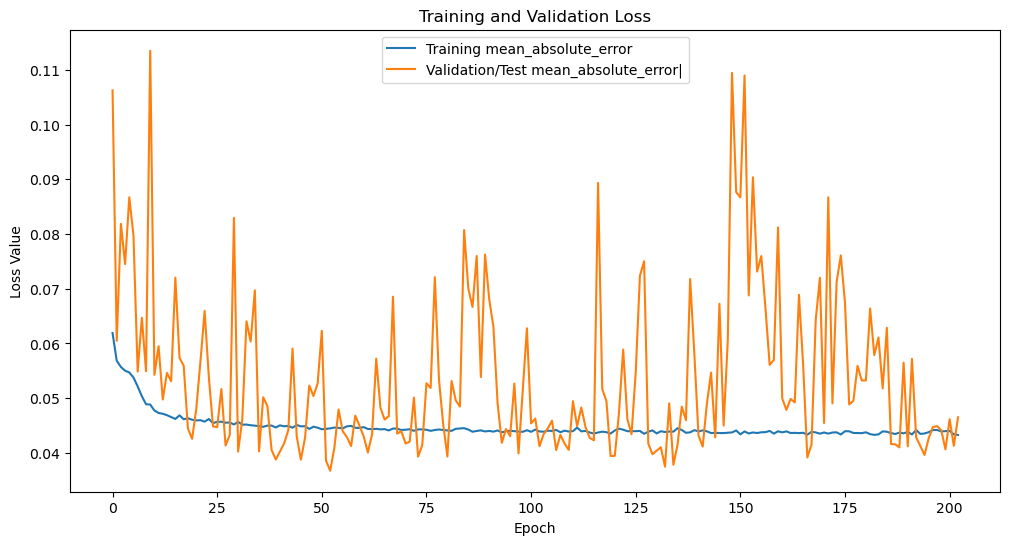

In [35]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Training mean_absolute_error')
plt.plot(history.history['val_mean_squared_error'], label='Validation/Test mean_absolute_error|')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [18]:
# Crear el modelo
model_3_ins = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_3_ins.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=150, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_3_ins = model_3_ins.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

model_3_ins.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0607 - mean_squared_error: 0.0607 - val_loss: 0.0903 - val_mean_squared_error: 0.0903
Epoch 2/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0593 - val_mean_squared_error: 0.0593
Epoch 3/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0522 - mean_squared_error: 0.0522 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 5/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0702 - val_mean_squared_error: 0.0702
Epoch 6/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 7/5000
731

Epoch 51/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 52/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 53/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 54/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 55/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 56/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0853 - val_mean_squared_error: 0.0853
Epoch 57/5

731/731 [==============================] - 4s 5ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0453 - val_mean_squared_error: 0.0453
Epoch 150/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1085 - val_mean_squared_error: 0.1085
Epoch 151/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 152/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 153/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 154/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 155/5000
731/

731/731 [==============================] - 3s 4ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 248/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 249/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 250/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.1340 - val_mean_squared_error: 0.1340
Epoch 251/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 252/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0882 - val_mean_squared_error: 0.0882
Epoch 253/5000
731/

731/731 [==============================] - 4s 6ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 346/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.1094 - val_mean_squared_error: 0.1094
Epoch 347/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.4399 - val_mean_squared_error: 0.4399
Epoch 348/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.1577 - val_mean_squared_error: 0.1577
Epoch 349/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.1083 - val_mean_squared_error: 0.1083
Epoch 350/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 351/5000
731/

[0.03349746763706207, 0.03349746763706207]

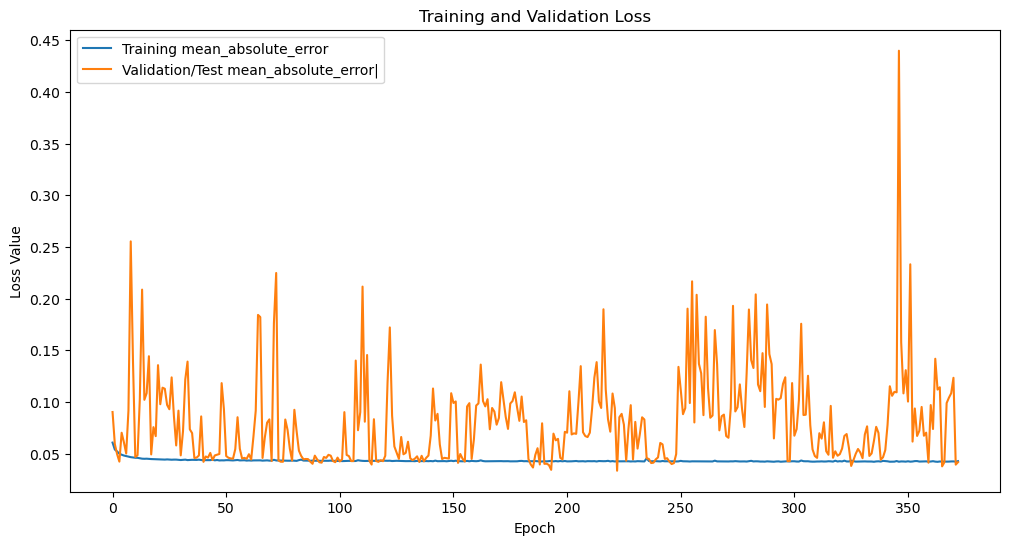

In [19]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_3_ins.history['mean_squared_error'], label='Training mean_absolute_error')
plt.plot(history_model_3_ins.history['val_mean_squared_error'], label='Validation/Test mean_absolute_error|')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [40]:
# Crear el modelo
start=perf_counter()

model_3_ins_1 = None
model_3_ins_1 = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_3_ins_1.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', patience=150, mode='min' ,restore_best_weights=True)
    
# Entrenar el modelo y guardar el historial
history_model_3_ins_1 = model_3_ins_1.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f hrs.' %tl)

model_3_ins_1.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0622 - mean_absolute_percentage_error: 79.0168 - val_loss: 0.0620 - val_mean_absolute_percentage_error: 33.4709
Epoch 2/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0549 - mean_absolute_percentage_error: 72.5860 - val_loss: 0.0614 - val_mean_absolute_percentage_error: 35.3475
Epoch 3/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0528 - mean_absolute_percentage_error: 68.3835 - val_loss: 0.0603 - val_mean_absolute_percentage_error: 33.7018
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0507 - mean_absolute_percentage_error: 63.8929 - val_loss: 0.0434 - val_mean_absolute_percentage_error: 33.7062
Epoch 5/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0498 - mean_absolute_percentage_error: 61.8869 - val_loss: 0.0480 - val_mean_absolute_percentage_error: 34.0561
Epoch 6/5000
731/731 [============================

Epoch 44/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0443 - mean_absolute_percentage_error: 53.4657 - val_loss: 0.1102 - val_mean_absolute_percentage_error: 42.8270
Epoch 45/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0441 - mean_absolute_percentage_error: 53.4233 - val_loss: 0.0600 - val_mean_absolute_percentage_error: 36.4253
Epoch 46/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0442 - mean_absolute_percentage_error: 53.7673 - val_loss: 0.0599 - val_mean_absolute_percentage_error: 33.7879
Epoch 47/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0441 - mean_absolute_percentage_error: 53.2478 - val_loss: 0.0460 - val_mean_absolute_percentage_error: 30.4588
Epoch 48/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0439 - mean_absolute_percentage_error: 53.1541 - val_loss: 0.0500 - val_mean_absolute_percentage_error: 32.4849
Epoch 49/5000
731/731 [======================

Epoch 87/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0437 - mean_absolute_percentage_error: 52.9019 - val_loss: 0.0525 - val_mean_absolute_percentage_error: 33.1340
Epoch 88/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0436 - mean_absolute_percentage_error: 52.6642 - val_loss: 0.0365 - val_mean_absolute_percentage_error: 30.8426
Epoch 89/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0438 - mean_absolute_percentage_error: 53.0935 - val_loss: 0.0436 - val_mean_absolute_percentage_error: 32.1806
Epoch 90/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0446 - mean_absolute_percentage_error: 54.0652 - val_loss: 0.0413 - val_mean_absolute_percentage_error: 32.2169
Epoch 91/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0451 - mean_absolute_percentage_error: 54.5208 - val_loss: 0.0675 - val_mean_absolute_percentage_error: 33.5287
Epoch 92/5000
731/731 [======================

Epoch 130/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0434 - mean_absolute_percentage_error: 52.5419 - val_loss: 0.0447 - val_mean_absolute_percentage_error: 32.1767
Epoch 131/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0432 - mean_absolute_percentage_error: 52.3871 - val_loss: 0.0587 - val_mean_absolute_percentage_error: 33.7177
Epoch 132/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0435 - mean_absolute_percentage_error: 52.7740 - val_loss: 0.0464 - val_mean_absolute_percentage_error: 31.1504
Epoch 133/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0433 - mean_absolute_percentage_error: 52.4559 - val_loss: 0.0602 - val_mean_absolute_percentage_error: 34.5595
Epoch 134/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0434 - mean_absolute_percentage_error: 52.6277 - val_loss: 0.1093 - val_mean_absolute_percentage_error: 42.9143
Epoch 135/5000
731/731 [================

Epoch 173/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0434 - mean_absolute_percentage_error: 52.4780 - val_loss: 0.3352 - val_mean_absolute_percentage_error: 48.6623
Epoch 174/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0433 - mean_absolute_percentage_error: 52.4687 - val_loss: 0.4708 - val_mean_absolute_percentage_error: 57.9808
Epoch 175/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0433 - mean_absolute_percentage_error: 52.7371 - val_loss: 0.0914 - val_mean_absolute_percentage_error: 38.4473
Epoch 176/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_absolute_percentage_error: 52.1314 - val_loss: 0.1978 - val_mean_absolute_percentage_error: 46.5057
Epoch 177/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_absolute_percentage_error: 52.0264 - val_loss: 0.1602 - val_mean_absolute_percentage_error: 42.6302
Epoch 178/5000
731/731 [================

[0.03712292015552521, 27.90331268310547]

In [ ]:
22.25

14.24

In [ ]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_3_ins_1.history['mean_squared_error'], label='Training mean_absolute_error')
plt.plot(history_model_3_ins_1.history['val_mean_squared_error'], label='Validation/Test mean_absolute_error|')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [384]:
# Crear el modelo
model_3_ins_2 = None
model_3_ins_2 = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


# optimizer = tf.keras.optimizers.Adam(
# #     learning_rate=0.001,
# #     rho=0.9,
# #     momentum=0.5,
# #     epsilon=1e-07,
# #     centered=True,
# #     weight_decay=0.0001,
# )

# Compilación del modelo
model_3_ins_2.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=150, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_3_ins_2 = model_3_ins_2.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

model_3_ins_2.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 2/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0920 - val_mean_squared_error: 0.0920
Epoch 3/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0495 - val_mean_squared_error: 0.0495
Epoch 5/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 7/5000
731

Epoch 51/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0634 - val_mean_squared_error: 0.0634
Epoch 52/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 53/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.2031 - val_mean_squared_error: 0.2031
Epoch 54/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 55/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 56/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0569 - val_mean_squared_error: 0.0569
Epoch 57/5

731/731 [==============================] - 4s 5ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0819 - val_mean_squared_error: 0.0819
Epoch 150/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 151/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.2602 - val_mean_squared_error: 0.2602
Epoch 152/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.1457 - val_mean_squared_error: 0.1457
Epoch 153/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 154/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.1281 - val_mean_squared_error: 0.1281
Epoch 155/5000
731/

731/731 [==============================] - 4s 5ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0588 - val_mean_squared_error: 0.0588
Epoch 248/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 249/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 250/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.1162 - val_mean_squared_error: 0.1162
Epoch 251/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.1924 - val_mean_squared_error: 0.1924
Epoch 252/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 253/5000
731/

731/731 [==============================] - 4s 5ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.4197 - val_mean_squared_error: 0.4197
Epoch 346/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.3377 - val_mean_squared_error: 0.3377
Epoch 347/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.4729 - val_mean_squared_error: 0.4729
Epoch 348/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.4538 - val_mean_squared_error: 0.4538
Epoch 349/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.5261 - val_mean_squared_error: 0.5261
Epoch 350/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 351/5000
731/

[0.036182548850774765, 0.036182548850774765]

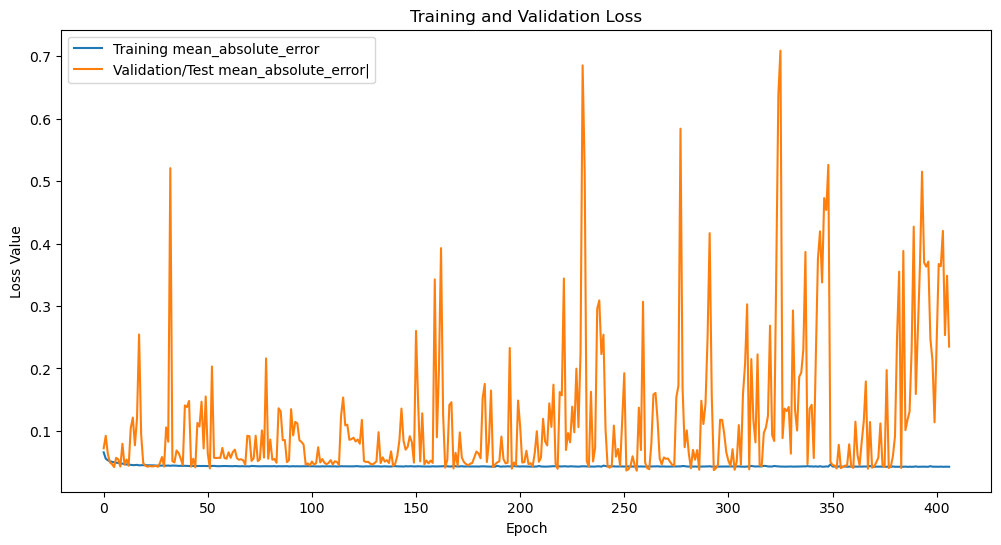

In [385]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_3_ins_2.history['mean_squared_error'], label='Training mean_absolute_error')
plt.plot(history_model_3_ins_2.history['val_mean_squared_error'], label='Validation/Test mean_absolute_error|')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Testing Phase

In [18]:
cie2rgb = keras.Sequential([
    keras.layers.Dense(512, input_shape = (2,), activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(3)
])

cie2rgb.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', patience=10, mode='min' ,restore_best_weights=True)

cie2rgb.fit(x2_df,  x_df, epochs=5000, validation_data=(x2_test, x_test), callbacks=[callback])

cie2rgb.evaluate(x2_test, x_test)

Epoch 1/5000
696/696 [==============================] - 3s 3ms/step - loss: 0.0058 - mean_absolute_percentage_error: 6.3394 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 7.5436
Epoch 2/5000
696/696 [==============================] - 2s 3ms/step - loss: 3.2933e-05 - mean_absolute_percentage_error: 0.7146 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 6.2173
Epoch 3/5000
696/696 [==============================] - 2s 4ms/step - loss: 2.6944e-05 - mean_absolute_percentage_error: 0.6553 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 6.2716
Epoch 4/5000
696/696 [==============================] - 3s 5ms/step - loss: 1.9402e-05 - mean_absolute_percentage_error: 0.5592 - val_loss: 0.0014 - val_mean_absolute_percentage_error: 5.8296
Epoch 5/5000
696/696 [==============================] - 3s 4ms/step - loss: 1.3906e-05 - mean_absolute_percentage_error: 0.4806 - val_loss: 0.0013 - val_mean_absolute_percentage_error: 5.5121
Epoch 6/5000
696/696 [======================

[0.0010054806480184197, 4.757559776306152]

In [19]:
df_2.head()

D     H         T         x         y
0  0.19  0.30  0.333333  0.344131  0.349242
1  0.19  0.35  0.333333  0.352166  0.360159
2  0.19  0.40  0.333333  0.367040  0.379699
3  0.19  0.45  0.333333  0.387610  0.401142
4  0.19  0.50  0.333333  0.403249  0.401599

In [20]:
rgb_values = cie2rgb.predict(df_2[['x','y']])

145/145 [==============================] - 0s 1ms/step


In [21]:
rgb_df = pd.DataFrame(rgb_values, columns=['r','g','b'])
rgb_df.index = df_2.index
df_2 = pd.concat([df_2, rgb_df], axis=1)
df_2.head()

D     H         T         x         y         r         g         b
0  0.19  0.30  0.333333  0.344131  0.349242  0.684469  0.610898  0.557077
1  0.19  0.35  0.333333  0.352166  0.360159  0.697652  0.619575  0.536221
2  0.19  0.40  0.333333  0.367040  0.379699  0.721926  0.635608  0.494321
3  0.19  0.45  0.333333  0.387610  0.401142  0.759103  0.649347  0.436749
4  0.19  0.50  0.333333  0.403249  0.401599  0.797839  0.637637  0.416555

In [22]:
df_2.shape

(4618, 8)

In [23]:
import random
random.seed(a=17)
test_2 = [(random.random(), random.random(), random.random()) for i in range(1000)]
print(len(test_2))
test_2 = pd.DataFrame(test_2)
test_2.columns=['r','g','b']
test_2

1000


r         g         b
0    0.521984  0.806691  0.960495
1    0.289625  0.766107  0.704220
2    0.661383  0.110162  0.026937
3    0.384171  0.746395  0.252384
4    0.501603  0.317435  0.846328
..        ...       ...       ...
995  0.400034  0.083313  0.181476
996  0.693631  0.914663  0.280728
997  0.049622  0.380955  0.980771
998  0.075694  0.143321  0.941641
999  0.734658  0.052012  0.832345

[1000 rows x 3 columns]

In [24]:
knn_2 = KNeighborsRegressor(n_neighbors=1)
knn_2.fit(df_2.drop(['D', 'H', 'T','x','y'],axis=1), df_2[['D', 'H', 'T']])

# Prediciendo nuevos datos
predictions = knn_2.predict(test_2)
test_2 = pd.DataFrame(predictions)
test_2.columns=('D','H','T')
test_2

D     H         T
0    0.43  0.80  0.400000
1    0.19  0.80  0.866667
2    0.34  1.00  0.333333
3    0.25  0.40  0.933333
4    0.31  0.65  0.400000
..    ...   ...       ...
995  0.37  0.60  0.400000
996  0.25  0.45  0.866667
997  0.37  0.65  0.333333
998  0.37  0.65  0.466667
999  0.37  0.50  0.333333

[1000 rows x 3 columns]

In [25]:
test_2 = pd.merge(test_2, df_2[['r', 'g', 'b', 'D', 'H', 'T','x','y']], 
                  on=['D', 'H', 'T'], 
                  how='left')

x_test_2 = test_2.drop(['D', 'H', 'T','x','y'],axis=1)
y_test_2 = test_2[['D', 'H', 'T']]
x_test_2.shape,y_test_2.shape

((1000, 3), (1000, 3))

In [26]:
y_test_2.head()

D     H         T
0  0.43  0.80  0.400000
1  0.19  0.80  0.866667
2  0.34  1.00  0.333333
3  0.25  0.40  0.933333
4  0.31  0.65  0.400000

In [27]:
# Unir df1 con df2 usando un 'inner' merge
merged_df = test_2.merge(df_2, how='inner')

# Verificar si todas las filas de df1 están en df2
all_rows_present = len(merged_df) == len(test_2)
all_rows_present

True

In [28]:
# Concatenar df1 y df2
concatenated = pd.concat([test_2, df_2])

# Eliminar duplicados, manteniendo la primera ocurrencia (es decir, las filas de df1)
concatenated_unique = concatenated.drop_duplicates(keep='first')

# Eliminar las filas que estaban en df1 para obtener el df2 limpio
df_2 = concatenated_unique[~concatenated_unique.index.isin(test_2.index)]
df_2.shape

(3452, 8)

In [29]:
df_2.shape, test_2.shape

((3452, 8), (1000, 8))

In [30]:
y_train_2 = df_2[['D', 'H', 'T']] 
x_train_2_rgb = df_2[['r','g','b']]
x_train_2_xy = df_2[['x','y']]

In [31]:
x_train_2_rgb.shape, y_train_2.shape

((3452, 3), (3452, 3))

C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028
C:\Users\Private Richi\anaconda3\envs\DL\lib\site-packages\colour\utilities\verbose.py:262: ColourUsageWarning: "standalone" argument has been renamed to "show".
  warn(*args, **kwargs)  # noqa: B028


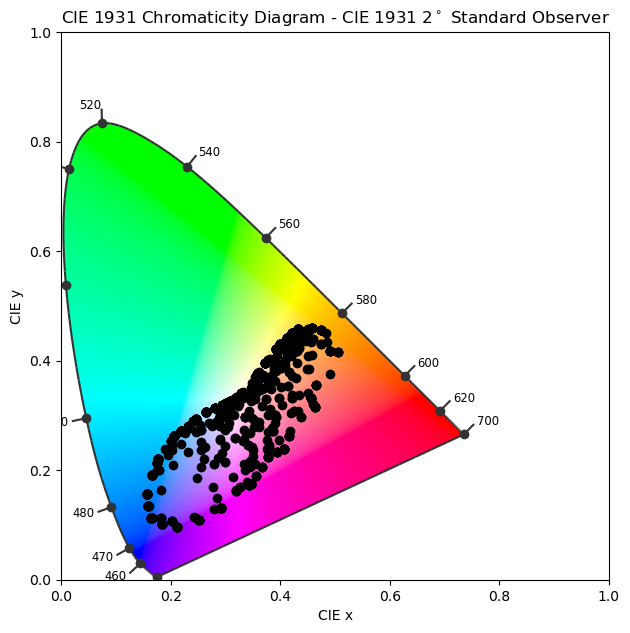

In [32]:
import colour
df_test_2 = pd.merge(test_2, df_test_2[['D', 'H', 'T']], 
                  on=['D', 'H', 'T'], 
                  how='left')

# Define your scatter plot points (CIE xy coordinates)
x = df_test_2['x']
y = df_test_2['y']

# Plot the CIE 1931 Chromaticity Diagram
colour.plotting.plot_chromaticity_diagram_CIE1931(standalone=False)

# Scatter plot of your points
plt.scatter(x, y, c='black')
# Show the plot
plt.show()

In [33]:
y_test_2 = test_2[['D','H','T']]

x_test_2_rgb = test_2[['r','g','b']]

x_test_2_xy = test_2[['x','y',]]

x_train_2_rgb.shape, y_test_2.shape

((3452, 3), (1000, 3))

In [39]:
# df_2 = utils.shuffle(df_2, random_state = 10)
# x_train, x_test, y_train, y_test = train_test_split(df_2[['y','x']], df_2[['D','H','T']],test_size=0.2,random_state=17)
# x_train.shape,x_test.shape

((2137, 2), (535, 2))

In [40]:
x_train_2_xy

x         y
2000  0.358303  0.358107
2001  0.334680  0.339943
2002  0.314246  0.325257
2003  0.301624  0.316380
2004  0.295549  0.311056
...        ...       ...
4615  0.324964  0.324816
4616  0.325321  0.324396
4617  0.325849  0.324577
4618  0.327808  0.327013
4619  0.367730  0.251856

[2414 rows x 2 columns]

##########################################################################################

In [50]:
model_ref_3_ins = keras.Sequential([
    keras.layers.Dense(950, input_shape = (3,), activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'sigmoid'),
    keras.layers.Dense(3)
])

model_ref_3_ins.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2500, mode='min' ,restore_best_weights=True)

history_model_ref_3_ins = model_ref_3_ins.fit(x_train_2_rgb, y_train_2, epochs=5000, validation_data=(x_test_2_rgb, y_test_2), callbacks=[callback])



Epoch 1/5000
84/84 [==============================] - 1s 8ms/step - loss: 0.0557 - mean_absolute_percentage_error: 38.4222 - val_loss: 0.1011 - val_mean_absolute_percentage_error: 77.6640
Epoch 2/5000
84/84 [==============================] - 0s 5ms/step - loss: 0.0507 - mean_absolute_percentage_error: 37.3306 - val_loss: 0.0657 - val_mean_absolute_percentage_error: 59.6057
Epoch 3/5000
84/84 [==============================] - 0s 5ms/step - loss: 0.0495 - mean_absolute_percentage_error: 36.5365 - val_loss: 0.0592 - val_mean_absolute_percentage_error: 53.2693
Epoch 4/5000
84/84 [==============================] - 0s 5ms/step - loss: 0.0473 - mean_absolute_percentage_error: 35.5355 - val_loss: 0.0592 - val_mean_absolute_percentage_error: 55.3369
Epoch 5/5000
84/84 [==============================] - 0s 5ms/step - loss: 0.0481 - mean_absolute_percentage_error: 35.8264 - val_loss: 0.0545 - val_mean_absolute_percentage_error: 46.7801
Epoch 6/5000
84/84 [==============================] - 0s 5ms

Epoch 345/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0319 - mean_absolute_percentage_error: 26.4671 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.2452
Epoch 346/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0316 - mean_absolute_percentage_error: 26.2063 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 28.0750
Epoch 347/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0312 - mean_absolute_percentage_error: 26.0601 - val_loss: 0.0315 - val_mean_absolute_percentage_error: 31.1010
Epoch 348/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0318 - mean_absolute_percentage_error: 26.3771 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 28.2615
Epoch 349/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0303 - mean_absolute_percentage_error: 25.5639 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 30.2522
Epoch 350/5000
108/108 [================

Epoch 388/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0314 - mean_absolute_percentage_error: 26.1709 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 27.3494
Epoch 389/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0313 - mean_absolute_percentage_error: 26.0874 - val_loss: 0.0288 - val_mean_absolute_percentage_error: 28.7671
Epoch 390/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0306 - mean_absolute_percentage_error: 25.6759 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 30.1139
Epoch 391/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0307 - mean_absolute_percentage_error: 25.6389 - val_loss: 0.0301 - val_mean_absolute_percentage_error: 30.3765
Epoch 392/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0335 - mean_absolute_percentage_error: 27.2159 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 27.2489
Epoch 393/5000
108/108 [================

Epoch 431/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 25.4258 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 31.4364
Epoch 432/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0349 - mean_absolute_percentage_error: 28.0554 - val_loss: 0.0376 - val_mean_absolute_percentage_error: 36.5475
Epoch 433/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0312 - mean_absolute_percentage_error: 25.8868 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 29.0841
Epoch 434/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0303 - mean_absolute_percentage_error: 25.6507 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 28.1313
Epoch 435/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0308 - mean_absolute_percentage_error: 25.7345 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 27.7526
Epoch 436/5000
108/108 [================

Epoch 474/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0314 - mean_absolute_percentage_error: 25.9017 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 27.4123
Epoch 475/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0312 - mean_absolute_percentage_error: 26.1184 - val_loss: 0.0320 - val_mean_absolute_percentage_error: 31.5476
Epoch 476/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0307 - mean_absolute_percentage_error: 25.7388 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 28.3603
Epoch 477/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0315 - mean_absolute_percentage_error: 26.2825 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 30.0906
Epoch 478/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0309 - mean_absolute_percentage_error: 25.9207 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 29.0874
Epoch 479/5000
108/108 [================

Epoch 517/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 25.2071 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 29.4463
Epoch 518/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0301 - mean_absolute_percentage_error: 25.1798 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 27.1569
Epoch 519/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0309 - mean_absolute_percentage_error: 25.8680 - val_loss: 0.0278 - val_mean_absolute_percentage_error: 28.7322
Epoch 520/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0299 - mean_absolute_percentage_error: 25.2269 - val_loss: 0.0302 - val_mean_absolute_percentage_error: 29.7133
Epoch 521/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0300 - mean_absolute_percentage_error: 25.2484 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 27.3817
Epoch 522/5000
108/108 [================

Epoch 560/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 25.0660 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 28.5049
Epoch 561/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.6320 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.0087
Epoch 562/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 25.0003 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 30.0329
Epoch 563/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 25.0837 - val_loss: 0.0246 - val_mean_absolute_percentage_error: 26.2043
Epoch 564/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0301 - mean_absolute_percentage_error: 25.1397 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 29.5003
Epoch 565/5000
108/108 [================

Epoch 603/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0346 - mean_absolute_percentage_error: 27.5856 - val_loss: 0.0366 - val_mean_absolute_percentage_error: 36.0062
Epoch 604/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0325 - mean_absolute_percentage_error: 27.1002 - val_loss: 0.0321 - val_mean_absolute_percentage_error: 29.6366
Epoch 605/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 25.1764 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 29.1683
Epoch 606/5000
108/108 [==============================] - 1s 6ms/step - loss: 0.0297 - mean_absolute_percentage_error: 25.1428 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 26.1628
Epoch 607/5000
108/108 [==============================] - 1s 6ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.9828 - val_loss: 0.0337 - val_mean_absolute_percentage_error: 31.0425
Epoch 608/5000
108/108 [================

Epoch 646/5000
108/108 [==============================] - 1s 6ms/step - loss: 0.0291 - mean_absolute_percentage_error: 24.6534 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.7154
Epoch 647/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.8601 - val_loss: 0.0280 - val_mean_absolute_percentage_error: 27.4630
Epoch 648/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_percentage_error: 25.3426 - val_loss: 0.0312 - val_mean_absolute_percentage_error: 29.7386
Epoch 649/5000
108/108 [==============================] - 1s 6ms/step - loss: 0.0310 - mean_absolute_percentage_error: 25.7766 - val_loss: 0.0303 - val_mean_absolute_percentage_error: 28.9340
Epoch 650/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0292 - mean_absolute_percentage_error: 24.7776 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 26.8096
Epoch 651/5000
108/108 [================

Epoch 689/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0288 - mean_absolute_percentage_error: 24.4233 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 26.9618
Epoch 690/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0297 - mean_absolute_percentage_error: 25.0394 - val_loss: 0.0252 - val_mean_absolute_percentage_error: 27.3272
Epoch 691/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0309 - mean_absolute_percentage_error: 25.6692 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 29.4338
Epoch 692/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0299 - mean_absolute_percentage_error: 25.2515 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 29.6351
Epoch 693/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 25.0269 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 28.6062
Epoch 694/5000
108/108 [================

Epoch 732/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_percentage_error: 25.3803 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 29.9810
Epoch 733/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 25.1201 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 25.5153
Epoch 734/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0307 - mean_absolute_percentage_error: 25.3968 - val_loss: 0.0257 - val_mean_absolute_percentage_error: 27.9043
Epoch 735/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.9996 - val_loss: 0.0310 - val_mean_absolute_percentage_error: 29.1173
Epoch 736/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0282 - mean_absolute_percentage_error: 24.2659 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 27.4322
Epoch 737/5000
108/108 [================

Epoch 775/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 25.0013 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 28.0524
Epoch 776/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.8203 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 28.7925
Epoch 777/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 24.4121 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 29.4447
Epoch 778/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.3270 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 29.1551
Epoch 779/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0312 - mean_absolute_percentage_error: 25.9588 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 29.0498
Epoch 780/5000
108/108 [================

Epoch 818/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.8483 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 26.9987
Epoch 819/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.5071 - val_loss: 0.0238 - val_mean_absolute_percentage_error: 25.6452
Epoch 820/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 24.0375 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 28.2398
Epoch 821/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.7551 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 27.9784
Epoch 822/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0291 - mean_absolute_percentage_error: 24.5924 - val_loss: 0.0294 - val_mean_absolute_percentage_error: 28.3396
Epoch 823/5000
108/108 [================

Epoch 861/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.1722 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 26.4998
Epoch 862/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0299 - mean_absolute_percentage_error: 25.1352 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 27.4201
Epoch 863/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.9800 - val_loss: 0.0280 - val_mean_absolute_percentage_error: 29.0145
Epoch 864/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 25.1021 - val_loss: 0.0252 - val_mean_absolute_percentage_error: 26.0627
Epoch 865/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.8453 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.7441
Epoch 866/5000
108/108 [================

Epoch 904/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0299 - mean_absolute_percentage_error: 25.2425 - val_loss: 0.0330 - val_mean_absolute_percentage_error: 30.5985
Epoch 905/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.3391 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.7305
Epoch 906/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.5035 - val_loss: 0.0310 - val_mean_absolute_percentage_error: 28.9716
Epoch 907/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.2682 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 28.7240
Epoch 908/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0300 - mean_absolute_percentage_error: 25.0491 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 29.8278
Epoch 909/5000
108/108 [================

Epoch 947/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.0834 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 27.6090
Epoch 948/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 24.0225 - val_loss: 0.0269 - val_mean_absolute_percentage_error: 26.4880
Epoch 949/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_percentage_error: 25.1943 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 29.2712
Epoch 950/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 24.0884 - val_loss: 0.0301 - val_mean_absolute_percentage_error: 29.9651
Epoch 951/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 25.0333 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.9777
Epoch 952/5000
108/108 [================

Epoch 990/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 24.1871 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 25.9969
Epoch 991/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.2220 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 27.3814
Epoch 992/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 24.9104 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 28.9563
Epoch 993/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 24.3134 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.1465
Epoch 994/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.3256 - val_loss: 0.0305 - val_mean_absolute_percentage_error: 28.8027
Epoch 995/5000
108/108 [================

108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 24.0556 - val_loss: 0.0303 - val_mean_absolute_percentage_error: 28.9719
Epoch 1033/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.4614 - val_loss: 0.0359 - val_mean_absolute_percentage_error: 32.8990
Epoch 1034/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 24.9741 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 30.5893
Epoch 1035/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_percentage_error: 25.2862 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 29.4129
Epoch 1036/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.1990 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 28.3411
Epoch 1037/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 24.2911 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 27.1122
Epoch 1075/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0288 - mean_absolute_percentage_error: 24.4774 - val_loss: 0.0261 - val_mean_absolute_percentage_error: 27.2090
Epoch 1076/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0314 - mean_absolute_percentage_error: 25.7199 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 29.0707
Epoch 1077/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.3849 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.2117
Epoch 1078/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 24.0531 - val_loss: 0.0276 - val_mean_absolute_percentage_error: 27.4364
Epoch 1079/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.5198 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 29.3347
Epoch 1117/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.6562 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 26.0536
Epoch 1118/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.3212 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 28.1101
Epoch 1119/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0297 - mean_absolute_percentage_error: 24.8240 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 28.4111
Epoch 1120/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0287 - mean_absolute_percentage_error: 24.3857 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 31.0931
Epoch 1121/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.1382 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.1400
Epoch 1159/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.6583 - val_loss: 0.0286 - val_mean_absolute_percentage_error: 28.0530
Epoch 1160/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0288 - mean_absolute_percentage_error: 24.5605 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 31.7335
Epoch 1161/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.1516 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.0009
Epoch 1162/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.9908 - val_loss: 0.0246 - val_mean_absolute_percentage_error: 26.4979
Epoch 1163/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.6547 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 27.8759
Epoch 1201/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0273 - mean_absolute_percentage_error: 23.4243 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 26.6196
Epoch 1202/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.4337 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.5197
Epoch 1203/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.7881 - val_loss: 0.0265 - val_mean_absolute_percentage_error: 26.8643
Epoch 1204/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 23.1184 - val_loss: 0.0265 - val_mean_absolute_percentage_error: 27.3564
Epoch 1205/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0278 - mean_absolute_percentage_error: 23.7454 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 28.0574
Epoch 1243/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0295 - mean_absolute_percentage_error: 24.8548 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 29.8451
Epoch 1244/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0307 - mean_absolute_percentage_error: 25.5965 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 30.6138
Epoch 1245/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.7141 - val_loss: 0.0231 - val_mean_absolute_percentage_error: 26.1943
Epoch 1246/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0298 - mean_absolute_percentage_error: 25.1105 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 28.8525
Epoch 1247/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0307 - mean_absolute_percentage_error: 25.7436 - val_loss: 0.0220 - val_mean_absolute_percentage_error: 24.0815
Epoch 1285/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0300 - mean_absolute_percentage_error: 25.3202 - val_loss: 0.0306 - val_mean_absolute_percentage_error: 28.9088
Epoch 1286/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0299 - mean_absolute_percentage_error: 25.2860 - val_loss: 0.0321 - val_mean_absolute_percentage_error: 31.0785
Epoch 1287/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0297 - mean_absolute_percentage_error: 25.0403 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 29.2717
Epoch 1288/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 25.0369 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 26.6146
Epoch 1289/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.3690 - val_loss: 0.0329 - val_mean_absolute_percentage_error: 31.2053
Epoch 1327/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.0824 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 26.5996
Epoch 1328/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0287 - mean_absolute_percentage_error: 24.2774 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 27.7083
Epoch 1329/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0276 - mean_absolute_percentage_error: 23.7183 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 27.7433
Epoch 1330/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.7872 - val_loss: 0.0194 - val_mean_absolute_percentage_error: 22.4695
Epoch 1331/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.1350 - val_loss: 0.0316 - val_mean_absolute_percentage_error: 30.4050
Epoch 1369/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 24.2347 - val_loss: 0.0321 - val_mean_absolute_percentage_error: 30.5969
Epoch 1370/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0292 - mean_absolute_percentage_error: 24.5270 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 27.5669
Epoch 1371/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.4697 - val_loss: 0.0291 - val_mean_absolute_percentage_error: 29.2057
Epoch 1372/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.2683 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 27.7194
Epoch 1373/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0273 - mean_absolute_percentage_error: 23.6998 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.2189
Epoch 1411/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.5972 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 27.9626
Epoch 1412/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 23.3445 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 27.4230
Epoch 1413/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.8480 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 27.1459
Epoch 1414/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.5286 - val_loss: 0.0232 - val_mean_absolute_percentage_error: 25.7803
Epoch 1415/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 24.1580 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 27.7440
Epoch 1453/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.4349 - val_loss: 0.0226 - val_mean_absolute_percentage_error: 25.1790
Epoch 1454/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.6755 - val_loss: 0.0231 - val_mean_absolute_percentage_error: 25.7102
Epoch 1455/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.5480 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 26.6435
Epoch 1456/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.4304 - val_loss: 0.0300 - val_mean_absolute_percentage_error: 28.7953
Epoch 1457/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0282 - mean_absolute_percentage_error: 24.0088 - val_loss: 0.0249 - val_mean_absolute_percentage_error: 25.8883
Epoch 1495/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.6294 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 28.8482
Epoch 1496/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0278 - mean_absolute_percentage_error: 23.8953 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 29.8743
Epoch 1497/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.6834 - val_loss: 0.0246 - val_mean_absolute_percentage_error: 25.3193
Epoch 1498/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.6957 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 28.5028
Epoch 1499/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.4463 - val_loss: 0.0261 - val_mean_absolute_percentage_error: 26.8823
Epoch 1537/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 23.0660 - val_loss: 0.0220 - val_mean_absolute_percentage_error: 23.6636
Epoch 1538/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0292 - mean_absolute_percentage_error: 24.4483 - val_loss: 0.0265 - val_mean_absolute_percentage_error: 27.1765
Epoch 1539/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.2790 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.5973
Epoch 1540/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0288 - mean_absolute_percentage_error: 24.2725 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 28.6233
Epoch 1541/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.9354 - val_loss: 0.0257 - val_mean_absolute_percentage_error: 26.7072
Epoch 1579/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.0565 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 28.7038
Epoch 1580/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0291 - mean_absolute_percentage_error: 24.1948 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 27.7934
Epoch 1581/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.9743 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 30.8166
Epoch 1582/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0351 - mean_absolute_percentage_error: 28.2551 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.6454
Epoch 1583/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.9174 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.1204
Epoch 1621/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.5388 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 26.6611
Epoch 1622/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 24.1197 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 27.7327
Epoch 1623/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 23.2006 - val_loss: 0.0285 - val_mean_absolute_percentage_error: 27.8830
Epoch 1624/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.0649 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 28.8113
Epoch 1625/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.2389 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 28.0022
Epoch 1663/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 23.1646 - val_loss: 0.0384 - val_mean_absolute_percentage_error: 32.2218
Epoch 1664/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.7306 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 28.1757
Epoch 1665/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.0587 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.2347
Epoch 1666/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 24.0218 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 30.2027
Epoch 1667/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.5260 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 29.9823
Epoch 1705/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.4577 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 30.3789
Epoch 1706/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 24.6145 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 30.3101
Epoch 1707/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 24.3125 - val_loss: 0.0316 - val_mean_absolute_percentage_error: 29.8627
Epoch 1708/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.3775 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 30.2875
Epoch 1709/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.5268 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 26.8602
Epoch 1747/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.6635 - val_loss: 0.0288 - val_mean_absolute_percentage_error: 28.3212
Epoch 1748/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.0356 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 25.3180
Epoch 1749/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0302 - mean_absolute_percentage_error: 25.1710 - val_loss: 0.0305 - val_mean_absolute_percentage_error: 30.2922
Epoch 1750/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0276 - mean_absolute_percentage_error: 23.8628 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.3958
Epoch 1751/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.4384 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 25.6532
Epoch 1789/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.2903 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.2239
Epoch 1790/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0290 - mean_absolute_percentage_error: 24.2529 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 28.0929
Epoch 1791/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.8780 - val_loss: 0.0323 - val_mean_absolute_percentage_error: 30.2494
Epoch 1792/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0276 - mean_absolute_percentage_error: 23.6930 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.7446
Epoch 1793/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9739 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 26.9109
Epoch 1831/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 23.0917 - val_loss: 0.0234 - val_mean_absolute_percentage_error: 25.7514
Epoch 1832/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.1957 - val_loss: 0.0328 - val_mean_absolute_percentage_error: 29.6005
Epoch 1833/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 23.9396 - val_loss: 0.0305 - val_mean_absolute_percentage_error: 29.5122
Epoch 1834/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.5980 - val_loss: 0.0250 - val_mean_absolute_percentage_error: 27.2565
Epoch 1835/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.7497 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 26.4238
Epoch 1873/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.5893 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.8993
Epoch 1874/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.2159 - val_loss: 0.0310 - val_mean_absolute_percentage_error: 28.9078
Epoch 1875/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9521 - val_loss: 0.0202 - val_mean_absolute_percentage_error: 23.3354
Epoch 1876/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.2021 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 28.1460
Epoch 1877/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.5896 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.3473
Epoch 1915/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.4856 - val_loss: 0.0260 - val_mean_absolute_percentage_error: 26.7091
Epoch 1916/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0290 - mean_absolute_percentage_error: 24.5416 - val_loss: 0.0275 - val_mean_absolute_percentage_error: 26.2024
Epoch 1917/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.1812 - val_loss: 0.0288 - val_mean_absolute_percentage_error: 28.7303
Epoch 1918/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.7088 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 26.6497
Epoch 1919/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.8499 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 28.2649
Epoch 1957/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 24.5083 - val_loss: 0.0268 - val_mean_absolute_percentage_error: 27.8622
Epoch 1958/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.2686 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.1071
Epoch 1959/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.7292 - val_loss: 0.0285 - val_mean_absolute_percentage_error: 28.1289
Epoch 1960/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.4134 - val_loss: 0.0268 - val_mean_absolute_percentage_error: 26.9264
Epoch 1961/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 23.0369 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 26.4109
Epoch 1999/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7645 - val_loss: 0.0327 - val_mean_absolute_percentage_error: 29.7091
Epoch 2000/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.8426 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.1284
Epoch 2001/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.2418 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.4657
Epoch 2002/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.1854 - val_loss: 0.0356 - val_mean_absolute_percentage_error: 31.4545
Epoch 2003/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8551 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.9324
Epoch 2041/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0261 - mean_absolute_percentage_error: 22.7020 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 27.2303
Epoch 2042/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.5113 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 28.0433
Epoch 2043/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0273 - mean_absolute_percentage_error: 23.3486 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 28.9774
Epoch 2044/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.0082 - val_loss: 0.0318 - val_mean_absolute_percentage_error: 30.1321
Epoch 2045/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.6651 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 28.5949
Epoch 2083/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 23.9605 - val_loss: 0.0333 - val_mean_absolute_percentage_error: 31.1834
Epoch 2084/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.2907 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 26.6835
Epoch 2085/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.2311 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 28.1166
Epoch 2086/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.4721 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.6011
Epoch 2087/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.0062 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 26.9016
Epoch 2125/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.2080 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 26.5581
Epoch 2126/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.5293 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 30.0711
Epoch 2127/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.3282 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.6662
Epoch 2128/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.1673 - val_loss: 0.0301 - val_mean_absolute_percentage_error: 29.1062
Epoch 2129/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0278 - mean_absolute_percentage_error: 23.5615 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 26.1325
Epoch 2167/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.9505 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 26.6026
Epoch 2168/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7623 - val_loss: 0.0286 - val_mean_absolute_percentage_error: 28.3935
Epoch 2169/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.6965 - val_loss: 0.0325 - val_mean_absolute_percentage_error: 30.3403
Epoch 2170/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.1559 - val_loss: 0.0237 - val_mean_absolute_percentage_error: 25.4533
Epoch 2171/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9312 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 29.4084
Epoch 2209/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.0323 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 28.8529
Epoch 2210/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0273 - mean_absolute_percentage_error: 23.3136 - val_loss: 0.0265 - val_mean_absolute_percentage_error: 27.5441
Epoch 2211/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 23.0164 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 27.2640
Epoch 2212/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.4937 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 29.0533
Epoch 2213/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.3928 - val_loss: 0.0265 - val_mean_absolute_percentage_error: 27.0570
Epoch 2251/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.1440 - val_loss: 0.0363 - val_mean_absolute_percentage_error: 31.7090
Epoch 2252/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.4426 - val_loss: 0.0304 - val_mean_absolute_percentage_error: 29.4208
Epoch 2253/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.4054 - val_loss: 0.0283 - val_mean_absolute_percentage_error: 28.0698
Epoch 2254/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.3686 - val_loss: 0.0304 - val_mean_absolute_percentage_error: 29.1233
Epoch 2255/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 22.1301 - val_loss: 0.0300 - val_mean_absolute_percentage_error: 28.7351
Epoch 2293/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0247 - mean_absolute_percentage_error: 21.7327 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 25.0464
Epoch 2294/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 23.8647 - val_loss: 0.0300 - val_mean_absolute_percentage_error: 29.7110
Epoch 2295/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0291 - mean_absolute_percentage_error: 24.3239 - val_loss: 0.0260 - val_mean_absolute_percentage_error: 26.8696
Epoch 2296/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.8148 - val_loss: 0.0320 - val_mean_absolute_percentage_error: 29.3396
Epoch 2297/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0253 - mean_absolute_percentage_error: 22.1889 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.8063
Epoch 2335/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0259 - mean_absolute_percentage_error: 22.4747 - val_loss: 0.0309 - val_mean_absolute_percentage_error: 29.0953
Epoch 2336/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.0398 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.7365
Epoch 2337/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7417 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 25.9442
Epoch 2338/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.8236 - val_loss: 0.0268 - val_mean_absolute_percentage_error: 27.6576
Epoch 2339/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 22.8951 - val_loss: 0.0307 - val_mean_absolute_percentage_error: 29.7968
Epoch 2377/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9052 - val_loss: 0.0239 - val_mean_absolute_percentage_error: 25.6479
Epoch 2378/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.7997 - val_loss: 0.0300 - val_mean_absolute_percentage_error: 30.2099
Epoch 2379/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 23.4926 - val_loss: 0.0327 - val_mean_absolute_percentage_error: 30.2291
Epoch 2380/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0282 - mean_absolute_percentage_error: 24.1040 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 30.2920
Epoch 2381/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0259 - mean_absolute_percentage_error: 22.5979 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.0862
Epoch 2419/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 22.4581 - val_loss: 0.0257 - val_mean_absolute_percentage_error: 26.9972
Epoch 2420/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 23.7675 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 27.0833
Epoch 2421/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.4650 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 28.9805
Epoch 2422/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.1239 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 28.5596
Epoch 2423/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.6742 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 26.9600
Epoch 2461/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.4978 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 28.8460
Epoch 2462/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7309 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.7909
Epoch 2463/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0276 - mean_absolute_percentage_error: 23.1635 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 28.7011
Epoch 2464/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.5566 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.5469
Epoch 2465/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2013 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 27.4190
Epoch 2503/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 22.9903 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 27.0994
Epoch 2504/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.5940 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 28.5524
Epoch 2505/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.4151 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 27.6889
Epoch 2506/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0271 - mean_absolute_percentage_error: 23.3707 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 27.4005
Epoch 2507/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.8263 - val_loss: 0.0256 - val_mean_absolute_percentage_error: 26.4830
Epoch 2545/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.8799 - val_loss: 0.0242 - val_mean_absolute_percentage_error: 25.4510
Epoch 2546/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.9026 - val_loss: 0.0276 - val_mean_absolute_percentage_error: 28.0884
Epoch 2547/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 22.0461 - val_loss: 0.0287 - val_mean_absolute_percentage_error: 27.6794
Epoch 2548/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.8803 - val_loss: 0.0243 - val_mean_absolute_percentage_error: 26.3655
Epoch 2549/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8598 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 27.3685
Epoch 2587/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 23.0281 - val_loss: 0.0312 - val_mean_absolute_percentage_error: 29.3624
Epoch 2588/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.2283 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 26.4791
Epoch 2589/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2022 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 26.5396
Epoch 2590/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 22.2653 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 27.9406
Epoch 2591/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.5584 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 28.2587
Epoch 2629/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.4690 - val_loss: 0.0260 - val_mean_absolute_percentage_error: 26.8366
Epoch 2630/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.5196 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 28.5522
Epoch 2631/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 22.0240 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 29.1887
Epoch 2632/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 23.7956 - val_loss: 0.0261 - val_mean_absolute_percentage_error: 27.1337
Epoch 2633/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.7530 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 30.2783
Epoch 2671/5000
108/108 [==============================] - 1s 13ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.2997 - val_loss: 0.0320 - val_mean_absolute_percentage_error: 30.0897
Epoch 2672/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.4428 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 28.5411
Epoch 2673/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.1652 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.7318
Epoch 2674/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9079 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 29.1928
Epoch 2675/5000
108/108 [=========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.6222 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.3917
Epoch 2713/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0278 - mean_absolute_percentage_error: 23.5240 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.8521
Epoch 2714/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.1907 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.7933
Epoch 2715/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7481 - val_loss: 0.0289 - val_mean_absolute_percentage_error: 28.5422
Epoch 2716/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0252 - mean_absolute_percentage_error: 22.0630 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 28.2648
Epoch 2717/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.2721 - val_loss: 0.0286 - val_mean_absolute_percentage_error: 27.7423
Epoch 2755/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.3356 - val_loss: 0.0276 - val_mean_absolute_percentage_error: 27.8838
Epoch 2756/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.7023 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 28.2583
Epoch 2757/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 24.5976 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 29.5770
Epoch 2758/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9635 - val_loss: 0.0302 - val_mean_absolute_percentage_error: 29.2744
Epoch 2759/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.1705 - val_loss: 0.0312 - val_mean_absolute_percentage_error: 31.2579
Epoch 2797/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0294 - mean_absolute_percentage_error: 24.8995 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 29.4227
Epoch 2798/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.9481 - val_loss: 0.0263 - val_mean_absolute_percentage_error: 26.8736
Epoch 2799/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.2337 - val_loss: 0.0261 - val_mean_absolute_percentage_error: 26.2487
Epoch 2800/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0248 - mean_absolute_percentage_error: 21.9116 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 28.9548
Epoch 2801/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.5250 - val_loss: 0.0278 - val_mean_absolute_percentage_error: 28.3064
Epoch 2839/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.2405 - val_loss: 0.0322 - val_mean_absolute_percentage_error: 30.3825
Epoch 2840/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.7149 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 27.9033
Epoch 2841/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7124 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 29.0186
Epoch 2842/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 23.8259 - val_loss: 0.0307 - val_mean_absolute_percentage_error: 29.7754
Epoch 2843/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8448 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 28.9470
Epoch 2881/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 23.0306 - val_loss: 0.0310 - val_mean_absolute_percentage_error: 29.5831
Epoch 2882/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0261 - mean_absolute_percentage_error: 22.6639 - val_loss: 0.0309 - val_mean_absolute_percentage_error: 28.8547
Epoch 2883/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.7359 - val_loss: 0.0291 - val_mean_absolute_percentage_error: 27.1948
Epoch 2884/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.1838 - val_loss: 0.0303 - val_mean_absolute_percentage_error: 28.4907
Epoch 2885/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2788 - val_loss: 0.0269 - val_mean_absolute_percentage_error: 27.5687
Epoch 2923/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0244 - mean_absolute_percentage_error: 21.6141 - val_loss: 0.0292 - val_mean_absolute_percentage_error: 28.1480
Epoch 2924/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0306 - mean_absolute_percentage_error: 24.1962 - val_loss: 0.0470 - val_mean_absolute_percentage_error: 48.6417
Epoch 2925/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0391 - mean_absolute_percentage_error: 30.7285 - val_loss: 0.0370 - val_mean_absolute_percentage_error: 37.7853
Epoch 2926/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0343 - mean_absolute_percentage_error: 28.0824 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 30.6663
Epoch 2927/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0273 - mean_absolute_percentage_error: 23.5803 - val_loss: 0.0331 - val_mean_absolute_percentage_error: 30.1840
Epoch 2965/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0292 - mean_absolute_percentage_error: 24.4841 - val_loss: 0.0293 - val_mean_absolute_percentage_error: 29.4210
Epoch 2966/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0279 - mean_absolute_percentage_error: 24.0407 - val_loss: 0.0234 - val_mean_absolute_percentage_error: 25.0203
Epoch 2967/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.9273 - val_loss: 0.0260 - val_mean_absolute_percentage_error: 26.9255
Epoch 2968/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.5456 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 28.4533
Epoch 2969/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 23.9625 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 28.1720
Epoch 3007/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 24.1408 - val_loss: 0.0287 - val_mean_absolute_percentage_error: 28.5531
Epoch 3008/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.0457 - val_loss: 0.0335 - val_mean_absolute_percentage_error: 31.0854
Epoch 3009/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.2601 - val_loss: 0.0251 - val_mean_absolute_percentage_error: 26.0467
Epoch 3010/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.5218 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 29.0853
Epoch 3011/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0262 - mean_absolute_percentage_error: 22.7075 - val_loss: 0.0224 - val_mean_absolute_percentage_error: 24.4294
Epoch 3049/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.8688 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 29.4949
Epoch 3050/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 22.9892 - val_loss: 0.0234 - val_mean_absolute_percentage_error: 27.2821
Epoch 3051/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 23.6218 - val_loss: 0.0330 - val_mean_absolute_percentage_error: 29.8314
Epoch 3052/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0277 - mean_absolute_percentage_error: 23.7681 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 27.0519
Epoch 3053/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 22.9865 - val_loss: 0.0305 - val_mean_absolute_percentage_error: 28.7413
Epoch 3091/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0261 - mean_absolute_percentage_error: 22.5974 - val_loss: 0.0257 - val_mean_absolute_percentage_error: 26.3603
Epoch 3092/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0258 - mean_absolute_percentage_error: 22.3441 - val_loss: 0.0250 - val_mean_absolute_percentage_error: 26.0922
Epoch 3093/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.1504 - val_loss: 0.0258 - val_mean_absolute_percentage_error: 26.6574
Epoch 3094/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 22.9303 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 26.7124
Epoch 3095/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.9413 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 28.3686
Epoch 3133/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.5524 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 27.0721
Epoch 3134/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.0610 - val_loss: 0.0284 - val_mean_absolute_percentage_error: 27.8936
Epoch 3135/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 22.9959 - val_loss: 0.0259 - val_mean_absolute_percentage_error: 27.0564
Epoch 3136/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.4238 - val_loss: 0.0278 - val_mean_absolute_percentage_error: 27.7694
Epoch 3137/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.3265 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.4598
Epoch 3175/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 22.3148 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 29.1753
Epoch 3176/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0285 - mean_absolute_percentage_error: 23.7903 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 28.4595
Epoch 3177/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.4694 - val_loss: 0.0319 - val_mean_absolute_percentage_error: 29.9656
Epoch 3178/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 22.9100 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 28.0589
Epoch 3179/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.6940 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 29.3839
Epoch 3217/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8250 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 25.6651
Epoch 3218/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0267 - mean_absolute_percentage_error: 22.8980 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 27.7882
Epoch 3219/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0250 - mean_absolute_percentage_error: 22.0236 - val_loss: 0.0290 - val_mean_absolute_percentage_error: 27.3489
Epoch 3220/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0246 - mean_absolute_percentage_error: 21.5731 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 27.3733
Epoch 3221/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.2265 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 27.7201
Epoch 3259/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0249 - mean_absolute_percentage_error: 21.8802 - val_loss: 0.0264 - val_mean_absolute_percentage_error: 27.4171
Epoch 3260/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0280 - mean_absolute_percentage_error: 23.7149 - val_loss: 0.0318 - val_mean_absolute_percentage_error: 29.1955
Epoch 3261/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.2802 - val_loss: 0.0354 - val_mean_absolute_percentage_error: 31.3498
Epoch 3262/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.8449 - val_loss: 0.0262 - val_mean_absolute_percentage_error: 27.9671
Epoch 3263/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0272 - mean_absolute_percentage_error: 23.2919 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 30.0299
Epoch 3301/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0289 - mean_absolute_percentage_error: 24.0841 - val_loss: 0.0294 - val_mean_absolute_percentage_error: 29.6801
Epoch 3302/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.7433 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 26.1515
Epoch 3303/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.9209 - val_loss: 0.0303 - val_mean_absolute_percentage_error: 27.6188
Epoch 3304/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.2102 - val_loss: 0.0316 - val_mean_absolute_percentage_error: 29.0120
Epoch 3305/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 23.0221 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 29.9063
Epoch 3343/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8450 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 29.6126
Epoch 3344/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.2394 - val_loss: 0.0249 - val_mean_absolute_percentage_error: 25.5128
Epoch 3345/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2743 - val_loss: 0.0271 - val_mean_absolute_percentage_error: 27.1164
Epoch 3346/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.8054 - val_loss: 0.0244 - val_mean_absolute_percentage_error: 26.4765
Epoch 3347/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0250 - mean_absolute_percentage_error: 22.1031 - val_loss: 0.0249 - val_mean_absolute_percentage_error: 25.7100
Epoch 3385/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.6574 - val_loss: 0.0298 - val_mean_absolute_percentage_error: 28.8721
Epoch 3386/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 22.2887 - val_loss: 0.0255 - val_mean_absolute_percentage_error: 27.1723
Epoch 3387/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 22.8347 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 29.1620
Epoch 3388/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0249 - mean_absolute_percentage_error: 21.7186 - val_loss: 0.0288 - val_mean_absolute_percentage_error: 27.9943
Epoch 3389/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.0698 - val_loss: 0.0268 - val_mean_absolute_percentage_error: 26.6176
Epoch 3427/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0247 - mean_absolute_percentage_error: 21.9039 - val_loss: 0.0280 - val_mean_absolute_percentage_error: 27.4105
Epoch 3428/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0259 - mean_absolute_percentage_error: 22.3746 - val_loss: 0.0297 - val_mean_absolute_percentage_error: 28.3646
Epoch 3429/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0250 - mean_absolute_percentage_error: 21.8220 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.3281
Epoch 3430/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2250 - val_loss: 0.0342 - val_mean_absolute_percentage_error: 32.6293
Epoch 3431/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0259 - mean_absolute_percentage_error: 22.3189 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 26.5988
Epoch 3469/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0284 - mean_absolute_percentage_error: 23.7526 - val_loss: 0.0291 - val_mean_absolute_percentage_error: 28.4570
Epoch 3470/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.5341 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 28.7484
Epoch 3471/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 21.9048 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 25.8559
Epoch 3472/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 22.1195 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 27.9937
Epoch 3473/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0265 - mean_absolute_percentage_error: 22.6794 - val_loss: 0.0272 - val_mean_absolute_percentage_error: 28.0523
Epoch 3511/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0268 - mean_absolute_percentage_error: 22.9464 - val_loss: 0.0266 - val_mean_absolute_percentage_error: 27.4979
Epoch 3512/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0253 - mean_absolute_percentage_error: 22.2112 - val_loss: 0.0287 - val_mean_absolute_percentage_error: 27.6206
Epoch 3513/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0254 - mean_absolute_percentage_error: 22.1091 - val_loss: 0.0281 - val_mean_absolute_percentage_error: 27.8960
Epoch 3514/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0252 - mean_absolute_percentage_error: 21.8773 - val_loss: 0.0277 - val_mean_absolute_percentage_error: 27.9722
Epoch 3515/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0291 - mean_absolute_percentage_error: 24.0733 - val_loss: 0.0247 - val_mean_absolute_percentage_error: 27.7241
Epoch 3553/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 22.1603 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 27.8670
Epoch 3554/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.2933 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 27.0755
Epoch 3555/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0250 - mean_absolute_percentage_error: 22.0097 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 27.2354
Epoch 3556/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0247 - mean_absolute_percentage_error: 21.5974 - val_loss: 0.0253 - val_mean_absolute_percentage_error: 26.2944
Epoch 3557/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0263 - mean_absolute_percentage_error: 22.5071 - val_loss: 0.0279 - val_mean_absolute_percentage_error: 27.8478
Epoch 3595/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0256 - mean_absolute_percentage_error: 22.3151 - val_loss: 0.0276 - val_mean_absolute_percentage_error: 27.7010
Epoch 3596/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0255 - mean_absolute_percentage_error: 22.2113 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 29.0746
Epoch 3597/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0249 - mean_absolute_percentage_error: 21.8400 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 27.1372
Epoch 3598/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.4427 - val_loss: 0.0309 - val_mean_absolute_percentage_error: 29.4604
Epoch 3599/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0257 - mean_absolute_percentage_error: 22.3775 - val_loss: 0.0278 - val_mean_absolute_percentage_error: 27.7940
Epoch 3637/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0270 - mean_absolute_percentage_error: 23.2393 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 28.1180
Epoch 3638/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0251 - mean_absolute_percentage_error: 21.9227 - val_loss: 0.0295 - val_mean_absolute_percentage_error: 28.1424
Epoch 3639/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0261 - mean_absolute_percentage_error: 22.6263 - val_loss: 0.0271 - val_mean_absolute_percentage_error: 27.1020
Epoch 3640/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.7857 - val_loss: 0.0249 - val_mean_absolute_percentage_error: 27.0204
Epoch 3641/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0353 - mean_absolute_percentage_error: 28.8181 - val_loss: 0.0392 - val_mean_absolute_percentage_error: 38.6132
Epoch 3679/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0345 - mean_absolute_percentage_error: 28.3042 - val_loss: 0.0389 - val_mean_absolute_percentage_error: 37.3137
Epoch 3680/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0328 - mean_absolute_percentage_error: 27.2439 - val_loss: 0.0355 - val_mean_absolute_percentage_error: 36.5566
Epoch 3681/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0321 - mean_absolute_percentage_error: 26.8351 - val_loss: 0.0339 - val_mean_absolute_percentage_error: 34.9177
Epoch 3682/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0322 - mean_absolute_percentage_error: 26.7778 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 33.2905
Epoch 3683/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0278 - mean_absolute_percentage_error: 23.8969 - val_loss: 0.0328 - val_mean_absolute_percentage_error: 32.0993
Epoch 3721/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0287 - mean_absolute_percentage_error: 24.3745 - val_loss: 0.0285 - val_mean_absolute_percentage_error: 29.0617
Epoch 3722/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0304 - mean_absolute_percentage_error: 25.4555 - val_loss: 0.0301 - val_mean_absolute_percentage_error: 30.4322
Epoch 3723/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 24.1816 - val_loss: 0.0309 - val_mean_absolute_percentage_error: 30.9049
Epoch 3724/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0286 - mean_absolute_percentage_error: 24.3476 - val_loss: 0.0332 - val_mean_absolute_percentage_error: 32.0746
Epoch 3725/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0296 - mean_absolute_percentage_error: 24.6566 - val_loss: 0.0317 - val_mean_absolute_percentage_error: 30.7362
Epoch 3763/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0283 - mean_absolute_percentage_error: 24.2658 - val_loss: 0.0314 - val_mean_absolute_percentage_error: 32.0593
Epoch 3764/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0281 - mean_absolute_percentage_error: 23.9334 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 29.7183
Epoch 3765/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0260 - mean_absolute_percentage_error: 22.7199 - val_loss: 0.0313 - val_mean_absolute_percentage_error: 30.1426
Epoch 3766/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0264 - mean_absolute_percentage_error: 22.8766 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 29.8093
Epoch 3767/5000
108/108 [==========================

108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.6703 - val_loss: 0.0308 - val_mean_absolute_percentage_error: 29.9856
Epoch 3805/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.5704 - val_loss: 0.0282 - val_mean_absolute_percentage_error: 28.6347
Epoch 3806/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0274 - mean_absolute_percentage_error: 23.4522 - val_loss: 0.0318 - val_mean_absolute_percentage_error: 31.1954
Epoch 3807/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0269 - mean_absolute_percentage_error: 23.2263 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 30.8068
Epoch 3808/5000
108/108 [==============================] - 1s 7ms/step - loss: 0.0275 - mean_absolute_percentage_error: 23.3059 - val_loss: 0.0285 - val_mean_absolute_percentage_error: 30.0592
Epoch 3809/5000
108/108 [==========================

In [51]:
model_ref_3_ins.evaluate(x_test_2_rgb, y_test_2)

16/16 [==============================] - 0s 2ms/step - loss: 0.0160 - mean_absolute_percentage_error: 18.7565


[0.016037367284297943, 18.756542205810547]

In [ ]:
#################################################################################################################################

In [48]:
# Crear el modelo
model_3_ins = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='sigmoid', kernel_initializer='normal'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_3_ins.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2500, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_3_ins = model_3_ins.fit(x_train_2_rgb, y_train_2, epochs=5000, validation_data=(x_test_2_rgb, y_test_2), callbacks=[callback])

model_3_ins.evaluate(x_test_2_rgb, y_test_2)

Epoch 1/5000
84/84 [==============================] - 1s 7ms/step - loss: 0.0582 - mean_absolute_percentage_error: 38.3813 - val_loss: 0.0591 - val_mean_absolute_percentage_error: 56.6523
Epoch 2/5000
84/84 [==============================] - 0s 6ms/step - loss: 0.0464 - mean_absolute_percentage_error: 36.3188 - val_loss: 0.0634 - val_mean_absolute_percentage_error: 59.2529
Epoch 3/5000
84/84 [==============================] - 1s 6ms/step - loss: 0.0461 - mean_absolute_percentage_error: 35.9483 - val_loss: 0.0533 - val_mean_absolute_percentage_error: 50.9697
Epoch 4/5000
84/84 [==============================] - 1s 7ms/step - loss: 0.0447 - mean_absolute_percentage_error: 35.3484 - val_loss: 0.0531 - val_mean_absolute_percentage_error: 47.0206
Epoch 5/5000
84/84 [==============================] - 1s 7ms/step - loss: 0.0449 - mean_absolute_percentage_error: 35.3747 - val_loss: 0.0514 - val_mean_absolute_percentage_error: 47.1567
Epoch 6/5000
84/84 [==============================] - 1s 7ms

[0.015456415712833405, 20.15980339050293]

##########################################################################################################################################

# Modelo Empleado en el Articulo con 2 Entradas

In [21]:
model_ref_2_ins = keras.Sequential([
    keras.layers.Dense(950, input_shape = (2,), activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'sigmoid'),
    keras.layers.Dense(3)
])

model_ref_2_ins.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)

history_model_ref_2_ins = model_ref_2_ins.fit(x2_df,  y2_df, epochs=5000, validation_data=(x2_test, y2_test), callbacks=[callback])

model_ref_2_ins.evaluate(x2_test, y2_test)

Epoch 1/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0658 - mean_absolute_percentage_error: 65.3616 - val_loss: 0.0680 - val_mean_absolute_percentage_error: 37.4824
Epoch 2/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0583 - mean_absolute_percentage_error: 61.6537 - val_loss: 0.0688 - val_mean_absolute_percentage_error: 36.9085
Epoch 3/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0578 - mean_absolute_percentage_error: 60.6333 - val_loss: 0.0829 - val_mean_absolute_percentage_error: 40.7082
Epoch 4/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0561 - mean_absolute_percentage_error: 59.6491 - val_loss: 0.0490 - val_mean_absolute_percentage_error: 36.5886
Epoch 5/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0556 - mean_absolute_percentage_error: 59.5866 - val_loss: 0.0743 - val_mean_absolute_percentage_error: 36.9603
Epoch 6/5000
469/469 [============================

[0.039227794855833054, 30.44774627685547]

In [22]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_2_ins.history['loss'], label='Training')
plt.plot(history_model_ref_2_ins.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Modelo Empleado en el Articulo con 3 Entradas

In [36]:
model_ref_3_ins = keras.Sequential([
    keras.layers.Dense(950, input_shape = (3,), activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'relu'),
    keras.layers.Dense(950, activation = 'sigmoid'),
    keras.layers.Dense(3)
])

model_ref_3_ins.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)

history_model_ref_3_ins = model_ref_3_ins.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

model_ref_3_ins.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0630 - mean_absolute_percentage_error: 76.2075 - val_loss: 0.0726 - val_mean_absolute_percentage_error: 40.2442
Epoch 2/5000
731/731 [==============================] - 3s 5ms/step - loss: 0.0582 - mean_absolute_percentage_error: 70.3255 - val_loss: 0.0814 - val_mean_absolute_percentage_error: 38.0635
Epoch 3/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0545 - mean_absolute_percentage_error: 65.8097 - val_loss: 0.0663 - val_mean_absolute_percentage_error: 40.9987
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0540 - mean_absolute_percentage_error: 63.9291 - val_loss: 0.0579 - val_mean_absolute_percentage_error: 37.4155
Epoch 5/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0541 - mean_absolute_percentage_error: 63.0477 - val_loss: 0.0567 - val_mean_absolute_percentage_error: 38.4114
Epoch 6/5000
731/731 [============================

[0.03510245308279991, 28.234376907348633]

In [37]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_3_ins.history['loss'], label='Training')
plt.plot(history_model_ref_3_ins.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Articulo 2

## Modelo de referencia con 3 entradas

In [21]:
start=perf_counter()
model_ref_2_ins_3 = keras.Sequential([
    keras.layers.Dense(40, input_shape = (3,), activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(3)
])

model_ref_2_ins_3.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min' ,restore_best_weights=True)

history_model_ref_2_ins_3 = model_ref_2_ins_3.fit(x_df,  y_df, epochs=5000, validation_data=(x_test, y_test), callbacks=[callback])

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f hrs.' %tl)

model_ref_2_ins_3.evaluate(x_test, y_test)

Epoch 1/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0613 - mean_absolute_percentage_error: 78.7888 - val_loss: 0.1076 - val_mean_absolute_percentage_error: 43.8612
Epoch 2/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0584 - mean_absolute_percentage_error: 77.5021 - val_loss: 0.0937 - val_mean_absolute_percentage_error: 43.1590
Epoch 3/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0584 - mean_absolute_percentage_error: 77.3610 - val_loss: 0.0996 - val_mean_absolute_percentage_error: 42.5969
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0583 - mean_absolute_percentage_error: 77.4227 - val_loss: 0.1109 - val_mean_absolute_percentage_error: 44.1795
Epoch 5/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0582 - mean_absolute_percentage_error: 77.3274 - val_loss: 0.1137 - val_mean_absolute_percentage_error: 44.2698
Epoch 6/5000
731/731 [============================

[0.07766000181436539, 40.280426025390625]

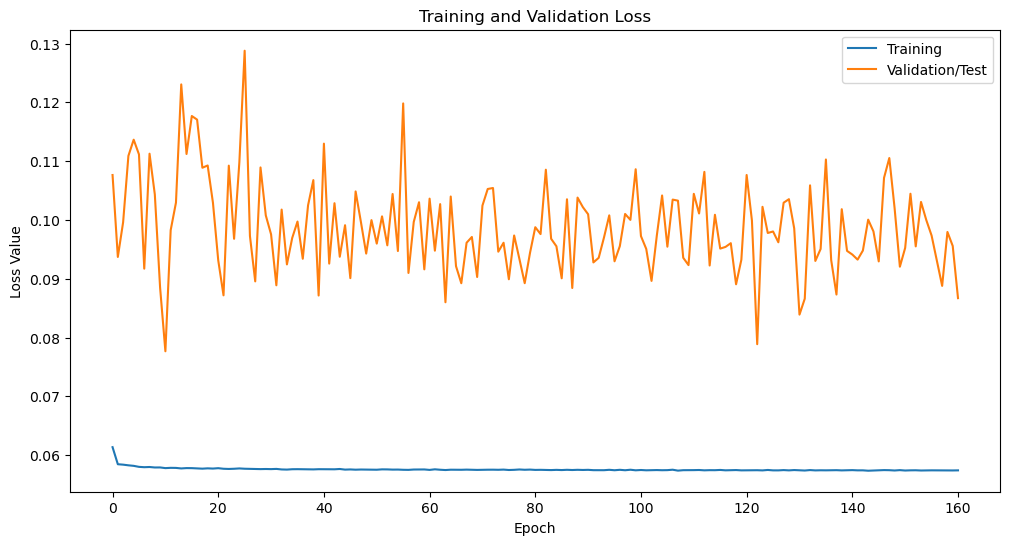

In [22]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_2_ins_3.history['loss'], label='Training')
plt.plot(history_model_ref_2_ins_3.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

## Modelo de referencia con 2 entradas

In [23]:
model_ref_2_ins_2 = keras.Sequential([
    keras.layers.Dense(40, input_shape = (2,), activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(40, activation = 'linear'),
    keras.layers.Dense(3)
])

model_ref_2_ins_2.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics = keras.metrics.MeanAbsolutePercentageError()
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)

history_model_ref_2_ins_2 = model_ref_2_ins_2.fit(x2_df,  y2_df, epochs=5000, validation_data=(x2_test, y2_test), callbacks=[callback])

model_ref_2_ins_2.evaluate(x2_test, y2_test)

Epoch 1/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0611 - mean_absolute_percentage_error: 79.2318 - val_loss: 0.0860 - val_mean_absolute_percentage_error: 41.4388
Epoch 2/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0585 - mean_absolute_percentage_error: 77.2915 - val_loss: 0.0829 - val_mean_absolute_percentage_error: 40.5714
Epoch 3/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0580 - mean_absolute_percentage_error: 76.9879 - val_loss: 0.0735 - val_mean_absolute_percentage_error: 40.6869
Epoch 4/5000
731/731 [==============================] - 4s 5ms/step - loss: 0.0581 - mean_absolute_percentage_error: 77.0556 - val_loss: 0.0885 - val_mean_absolute_percentage_error: 42.8941
Epoch 5/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0578 - mean_absolute_percentage_error: 76.9809 - val_loss: 0.0886 - val_mean_absolute_percentage_error: 41.2880
Epoch 6/5000
731/731 [============================

[0.07354877889156342, 40.68694305419922]

In [24]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_ref_2_ins_2.history['loss'], label='Training')
plt.plot(history_model_ref_2_ins_2.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Busqueda de Hiperparametros

In [24]:
# Define el modelo dentro de una función que tomará los hiperparámetros como argumentos
def create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6, activation_7, activation_8, activation_9,
    init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, init_mode_7, init_mode_8, init_mode_9, regularizer_type, optimizer):
    
    if regularizer_type == "l1":
        regularizer = keras.regularizers.l1(0.01)
    elif regularizer_type == "l2":
        regularizer = keras.regularizers.l2(0.01)
    else:
        regularizer = None
        
    
    model = keras.Sequential([
        keras.layers.Dense(950, input_shape=(3,), activation=activation_1, kernel_initializer=init_mode_1, kernel_regularizer = regularizer),
        keras.layers.Dense(950, activation=activation_2, kernel_initializer=init_mode_2),
        keras.layers.Dense(950, activation=activation_3, kernel_initializer=init_mode_3),
        keras.layers.Dense(950, activation=activation_4, kernel_initializer=init_mode_4),
        keras.layers.Dense(950, activation=activation_5, kernel_initializer=init_mode_5),
        keras.layers.Dense(950, activation=activation_6, kernel_initializer=init_mode_6),
        keras.layers.Dense(950, activation=activation_7, kernel_initializer=init_mode_7),
        keras.layers.Dense(950, activation=activation_8, kernel_initializer=init_mode_8),
        keras.layers.Dense(4, activation=activation_9, kernel_initializer=init_mode_9),
        keras.layers.Dense(3)
    ])
    model.compile(optimizer= optimizer,
                  loss=keras.losses.MeanSquaredError(),
                  metrics=[keras.metrics.MeanSquaredError(),])
    return model

# Función objetivo para Optuna
def objective(trial):
#     neuron_1 = trial.suggest_int('neuron_1', 3, 1024)
#     neuron_2 = trial.suggest_int('neuron_2', 3, 1024)
#     neuron_3 = trial.suggest_int('neuron_3', 3, 1024)
#     neuron_4 = trial.suggest_int('neuron_4', 3, 1024)
#     neuron_5 = trial.suggest_int('neuron_5', 3, 1024)
#     neuron_6 = trial.suggest_int('neuron_6', 3, 1024)
#     neuron_7 = trial.suggest_int('neuron_6', 3, 1024)
#     neuron_8 = trial.suggest_int('neuron_6', 3, 1024)
    
    activations_list = ["elu","exponential","hard_sigmoid","linear", "relu","selu","sigmoid","softmax","softplus",
                                                                                         "softsign","swish","tanh"]
    activation_1 = trial.suggest_categorical('activation_1', activations_list)
    activation_2 = trial.suggest_categorical('activation_2', activations_list)
    activation_3 = trial.suggest_categorical('activation_3', activations_list)
    activation_4 = trial.suggest_categorical('activation_4', activations_list)
    activation_5 = trial.suggest_categorical('activation_5', activations_list)
    activation_6 = trial.suggest_categorical('activation_6', activations_list)
    activation_7 = trial.suggest_categorical('activation_7', activations_list)
    activation_8 = trial.suggest_categorical('activation_8', activations_list)
    activation_9 = trial.suggest_categorical('activation_9', activations_list)
    
    init_list = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    init_mode_1 = trial.suggest_categorical('init_mode_1', init_list)
    init_mode_2 = trial.suggest_categorical('init_mode_2', init_list)
    init_mode_3 = trial.suggest_categorical('init_mode_3', init_list)
    init_mode_4 = trial.suggest_categorical('init_mode_4', init_list)
    init_mode_5 = trial.suggest_categorical('init_mode_5', init_list)
    init_mode_6 = trial.suggest_categorical('init_mode_6', init_list)
    init_mode_7 = trial.suggest_categorical('init_mode_7', init_list)
    init_mode_8 = trial.suggest_categorical('init_mode_8', init_list)
    init_mode_9 = trial.suggest_categorical('init_mode_9', init_list)
    
    regularizer_type = trial.suggest_categorical('regularizer_type', [None, "l1", "l2"])
    
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD', 'RMSprop'])
    
    model = create_model(activation_1, activation_2, activation_3, activation_4, activation_5, activation_6, activation_7, activation_8, activation_9,
    init_mode_1, init_mode_2, init_mode_3, init_mode_4, init_mode_5, init_mode_6, init_mode_7, init_mode_8, init_mode_9, regularizer_type, optimizer)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, mode='min' ,restore_best_weights=True)
    history = model.fit(x_df, y_df, epochs=100, validation_data=(x_test, y_test), verbose=0, callbacks=callback)
    
    # Usa la pérdida de validación como métrica para optimizar
    val_loss = history.history['val_mean_squared_error'][-1]
    return val_loss

# Iniciar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Mejores hiperparámetros:", study.best_params)


[I 2023-12-17 17:56:26,490] A new study created in memory with name: no-name-12a1c7a3-d5ac-4a16-8519-58e85b4e5bfe
[W 2023-12-17 17:58:15,344] Trial 0 failed with parameters: {'activation_1': 'tanh', 'activation_2': 'softplus', 'activation_3': 'linear', 'activation_4': 'softplus', 'activation_5': 'selu', 'activation_6': 'softplus', 'activation_7': 'elu', 'activation_8': 'exponential', 'activation_9': 'softplus', 'init_mode_1': 'he_normal', 'init_mode_2': 'he_uniform', 'init_mode_3': 'zero', 'init_mode_4': 'lecun_uniform', 'init_mode_5': 'uniform', 'init_mode_6': 'he_uniform', 'init_mode_7': 'he_normal', 'init_mode_8': 'glorot_normal', 'init_mode_9': 'normal', 'regularizer_type': 'l2', 'optimizer': 'Adam'} because of the following error: The value nan is not acceptable.
[W 2023-12-17 17:58:15,345] Trial 0 failed with value nan.
[I 2023-12-17 18:00:08,972] Trial 1 finished with value: 0.08779796957969666 and parameters: {'activation_1': 'tanh', 'activation_2': 'softplus', 'activation_3': 

Mejores hiperparámetros: {'activation_1': 'linear', 'activation_2': 'selu', 'activation_3': 'softsign', 'activation_4': 'sigmoid', 'activation_5': 'relu', 'activation_6': 'softplus', 'activation_7': 'softsign', 'activation_8': 'tanh', 'activation_9': 'linear', 'init_mode_1': 'glorot_uniform', 'init_mode_2': 'zero', 'init_mode_3': 'glorot_normal', 'init_mode_4': 'uniform', 'init_mode_5': 'glorot_normal', 'init_mode_6': 'glorot_uniform', 'init_mode_7': 'lecun_uniform', 'init_mode_8': 'he_uniform', 'init_mode_9': 'zero', 'regularizer_type': None, 'optimizer': 'Adam'}


[I 2023-12-15 18:50:51,436] Trial 35 finished with value: 0.03652323782444 and parameters: {'activation_1': 'swish', 'activation_2': 'relu', 'activation_3': 'softmax', 'activation_4': 'tanh', 'activation_5': 'elu', 'activation_6': 'softsign', 'init_mode_1': 'glorot_normal', 'init_mode_2': 'glorot_normal', 'init_mode_3': 'normal', 'init_mode_4': 'lecun_uniform', 'init_mode_5': 'uniform', 'init_mode_6': 'glorot_normal', 'regularizer_type': None, 'optimizer': 'Adam'}. Best is trial 35 with value: 0.03652323782444.

# Modelo Propuesto con 3 Entradas sRGB

In [49]:
start=perf_counter()
# Crear el modelo
tf.random.set_seed(0)
model_3_ins = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_3_ins.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_3_ins = model_3_ins.fit(y_df,  x_df, epochs=5000, validation_data=(y_test, x_test), callbacks=[callback],)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

model_3_ins.evaluate(y_test, x_test)

Epoch 1/5000
469/469 [==============================] - 4s 7ms/step - loss: 0.0078 - mean_absolute_percentage_error: 10.2651 - val_loss: 0.0254 - val_mean_absolute_percentage_error: 29.5968
Epoch 2/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.0038 - mean_absolute_percentage_error: 8.3678 - val_loss: 0.0240 - val_mean_absolute_percentage_error: 28.5343
Epoch 3/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.0034 - mean_absolute_percentage_error: 7.8758 - val_loss: 0.0209 - val_mean_absolute_percentage_error: 26.1816
Epoch 4/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.0031 - mean_absolute_percentage_error: 7.4443 - val_loss: 0.0221 - val_mean_absolute_percentage_error: 26.8692
Epoch 5/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.0029 - mean_absolute_percentage_error: 7.2348 - val_loss: 0.0210 - val_mean_absolute_percentage_error: 26.1822
Epoch 6/5000
469/469 [==============================] 

[0.019144797697663307, 24.67213249206543]

In [50]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_3_ins.history['loss'], label='Training')
plt.plot(history_model_3_ins.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Modelo Propuesto con dos entradas CIE XY

In [37]:
# Crear el modelo
model_2_ins = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(2,), activation='swish', kernel_initializer='he_normal', ),
#                        kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_2_ins.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_2_ins = model_2_ins.fit(x2_df,  y2_df, epochs=5000, validation_data=(x2_test, y2_test), callbacks=[callback],)

model_2_ins.evaluate(x2_test, y2_test)

Epoch 1/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0631 - mean_absolute_percentage_error: 80.8474 - val_loss: 0.0880 - val_mean_absolute_percentage_error: 39.6703
Epoch 2/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0569 - mean_absolute_percentage_error: 75.7255 - val_loss: 0.0787 - val_mean_absolute_percentage_error: 38.7150
Epoch 3/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0562 - mean_absolute_percentage_error: 74.2394 - val_loss: 0.0615 - val_mean_absolute_percentage_error: 35.8405
Epoch 4/5000
731/731 [==============================] - 4s 6ms/step - loss: 0.0552 - mean_absolute_percentage_error: 72.4734 - val_loss: 0.0708 - val_mean_absolute_percentage_error: 39.0311
Epoch 5/5000
731/731 [==============================] - 5s 6ms/step - loss: 0.0543 - mean_absolute_percentage_error: 71.2435 - val_loss: 0.0687 - val_mean_absolute_percentage_error: 38.0040
Epoch 6/5000
731/731 [============================

[0.03827310726046562, 31.15123176574707]

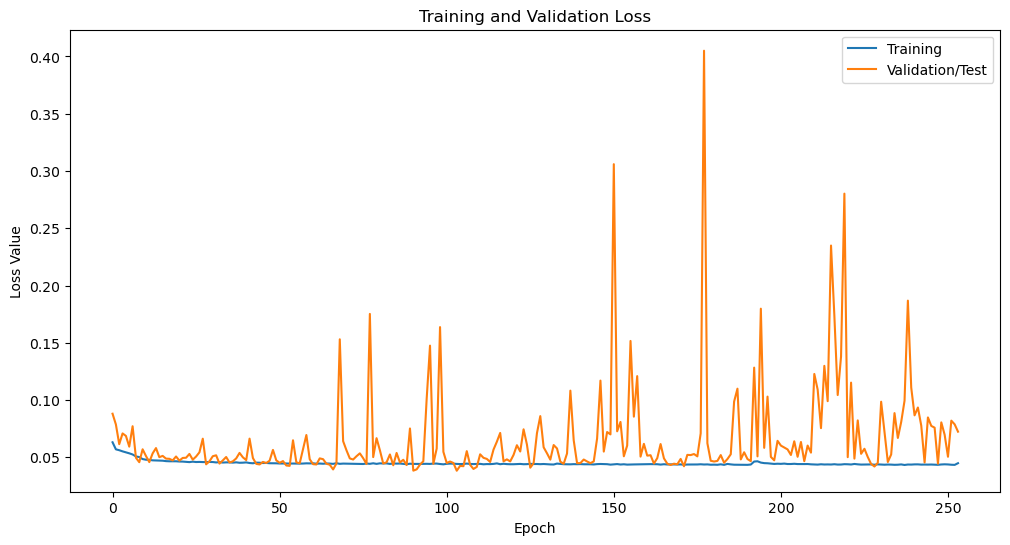

In [38]:
# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_model_2_ins.history['loss'], label='Training')
plt.plot(history_model_2_ins.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

Mejores hiperparámetros: {'activation_1': 'linear', 'activation_2': 'selu', 'activation_3': 'softsign', 'activation_4': 'sigmoid', 'activation_5': 'relu', 'activation_6': 'softplus', 'activation_7': 'softsign', 'activation_8': 'tanh', 'activation_9': 'linear', 'init_mode_1': 'glorot_uniform', 'init_mode_2': 'zero', 'init_mode_3': 'glorot_normal', 'init_mode_4': 'uniform', 'init_mode_5': 'glorot_normal', 'init_mode_6': 'glorot_uniform', 'init_mode_7': 'lecun_uniform', 'init_mode_8': 'he_uniform', 'init_mode_9': 'zero', 'regularizer_type': None, 'optimizer': 'Adam'}


# Autoencoder

x = color
y = parametros

## IDNN

In [79]:
input_enc = keras.layers.Input(3,)
enc = keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', )(input_enc)
enc = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(enc)

encoder = keras.models.Model(input_enc, enc)

## FDNN

Epoch 1/5000
469/469 [==============================] - 3s 6ms/step - loss: 0.0070 - val_loss: 0.0245
Epoch 2/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0037 - val_loss: 0.0229
Epoch 3/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0032 - val_loss: 0.0235
Epoch 4/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0029 - val_loss: 0.0215
Epoch 5/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0028 - val_loss: 0.0211
Epoch 6/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0027 - val_loss: 0.0213
Epoch 7/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0025 - val_loss: 0.0239
Epoch 8/5000
469/469 [==============================] - 2s 4ms/step - loss: 0.0025 - val_loss: 0.0245
Epoch 9/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.0028 - val_loss: 0.0251
Epoch 10/5000
469/469 [==============================] - 2s 5ms/step - loss: 0.002

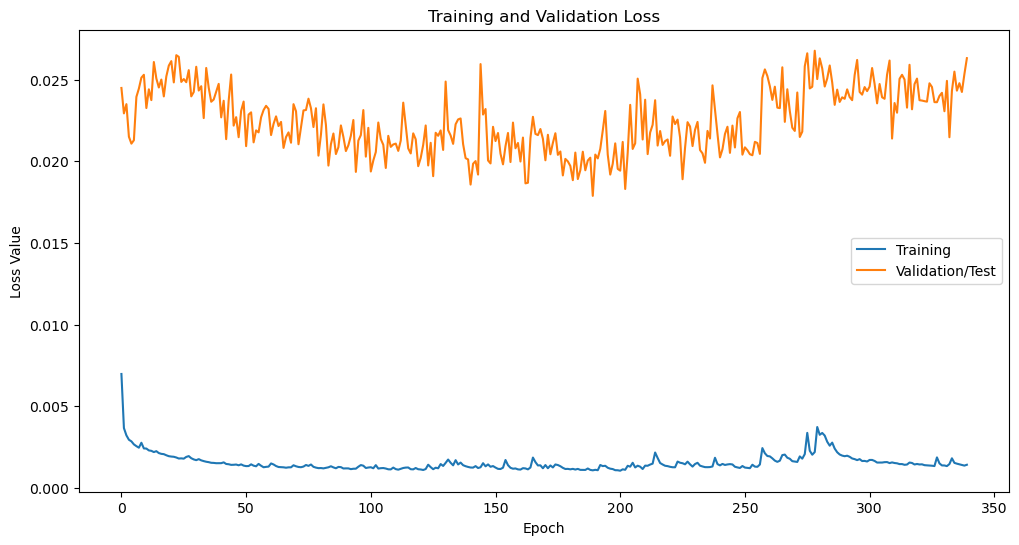

In [80]:
start=perf_counter()
input_dec = keras.layers.Input(shape = (3,))
dec = keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal',)(input_dec)
dec  = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(dec)

decoder = keras.models.Model(input_dec, dec)

decoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True)

history = decoder.fit(y_df,  x_df, epochs=5000, validation_data=(y_test, x_test), callbacks=[callback])

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

decoder.evaluate(y_test, x_test)

# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [81]:
start=perf_counter()
autoencoder_input = keras.layers.Input(shape=(3,))
encoded_repr = encoder(autoencoder_input)
reconstructed = decoder(encoded_repr)

autoencoder = keras.models.Model(autoencoder_input, reconstructed)

autoencoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=250, restore_best_weights=True)
autoencoder.fit(x_df,  x_df, epochs=5000, validation_data=(x_test, x_test),callbacks=[callback])

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

autoencoder.evaluate(x_test, x_test)

Epoch 1/5000
469/469 [==============================] - 5s 10ms/step - loss: 0.0067 - mean_absolute_percentage_error: 10.4937 - val_loss: 0.0826 - val_mean_absolute_percentage_error: 49.6280
Epoch 2/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.0062 - mean_absolute_percentage_error: 10.6416 - val_loss: 0.0269 - val_mean_absolute_percentage_error: 30.4657
Epoch 3/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.0055 - mean_absolute_percentage_error: 10.1894 - val_loss: 0.0273 - val_mean_absolute_percentage_error: 30.8375
Epoch 4/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.0053 - mean_absolute_percentage_error: 10.0820 - val_loss: 0.0270 - val_mean_absolute_percentage_error: 30.5368
Epoch 5/5000
469/469 [==============================] - 4s 8ms/step - loss: 0.0053 - mean_absolute_percentage_error: 10.1123 - val_loss: 0.0267 - val_mean_absolute_percentage_error: 30.1650
Epoch 6/5000
469/469 [===========================

[0.026578571647405624, 29.641836166381836]

In [82]:
pred = encoder.predict(x_test)
mean_squared_error(y_test, pred)

32/32 [==============================] - 0s 1ms/step


8.8871517821231425

In [ ]:
##################################################################################################################################

In [16]:
x_df.shape

(23378, 3)

# Propuesta Base

Epoch 1/5000
689/689 [==============================] - 6s 8ms/step - loss: 0.0075 - mean_absolute_percentage_error: 6.0126 - val_loss: 6.3320e-05 - val_mean_absolute_percentage_error: 0.8942
Epoch 2/5000
689/689 [==============================] - 6s 9ms/step - loss: 5.2793e-05 - mean_absolute_percentage_error: 0.8962 - val_loss: 3.6897e-05 - val_mean_absolute_percentage_error: 0.8257
Epoch 3/5000
689/689 [==============================] - 6s 8ms/step - loss: 9.2063e-05 - mean_absolute_percentage_error: 1.0034 - val_loss: 1.9390e-05 - val_mean_absolute_percentage_error: 0.5815
Epoch 4/5000
689/689 [==============================] - 5s 8ms/step - loss: 3.0263e-05 - mean_absolute_percentage_error: 0.6975 - val_loss: 3.1053e-05 - val_mean_absolute_percentage_error: 0.7558
Epoch 5/5000
689/689 [==============================] - 5s 7ms/step - loss: 5.8115e-05 - mean_absolute_percentage_error: 0.7657 - val_loss: 4.4334e-05 - val_mean_absolute_percentage_error: 0.9958
Epoch 6/5000
689/689 [==

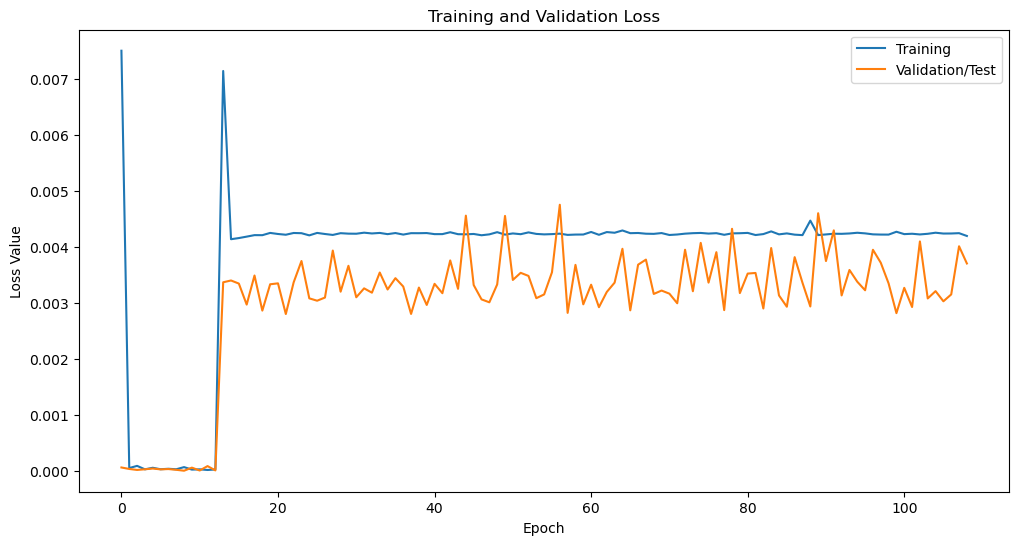

In [53]:
# Definir el encoder
input_enc = keras.layers.Input(shape=(3,))
enc = keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal')(input_enc)
enc = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(enc)
encoder_base = keras.models.Model(input_enc, enc)

# Definir el decoder
input_dec = keras.layers.Input(shape=(3,))
dec = keras.Sequential([
    keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(input_dec)
decoder_base = keras.models.Model(input_dec, dec)

# Construir el autoencoder
autoencoder_input = keras.layers.Input(shape=(3,))
encoded_repr = encoder_base(autoencoder_input)
reconstructed = decoder_base(encoded_repr)
autoencoder_base = keras.models.Model(autoencoder_input, reconstructed)

# Compilar el autoencoder
autoencoder_base.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError()]
)

# Entrenamiento del autoencoder
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
start = perf_counter()
history_base = autoencoder_base.fit(x_df, x_df, epochs=5000, validation_split=0.01, callbacks=[callback])
tl = (perf_counter() - start) / 60
print('Elapsed time: %.2f min.' % tl)

# Evaluar el autoencoder
autoencoder_base.evaluate(x_test, x_test)

# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_base.history['loss'], label='Training')
plt.plot(history_base.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

Con el fin de crear un nuevo modelo se predeciran los valor de x_df para generar x_pred

In [91]:
x_test.shape

(2000, 3)

In [92]:
train = x_test.iloc[:1000]
test = x_test.iloc[1000:]
train.shape, train.shape

((1000, 3), (1000, 3))

In [95]:
df_train = encoder_base.predict(train)
df_test = encoder_base.predict(test)

32/32 [==============================] - 0s 2ms/step


Epoch 1/5000
32/32 [==============================] - 1s 15ms/step - loss: 0.1056 - mean_absolute_percentage_error: 45.1733 - val_loss: 0.0426 - val_mean_absolute_percentage_error: 33.6015
Epoch 2/5000
32/32 [==============================] - 0s 7ms/step - loss: 0.0339 - mean_absolute_percentage_error: 29.5886 - val_loss: 0.0299 - val_mean_absolute_percentage_error: 27.6308
Epoch 3/5000
32/32 [==============================] - 0s 7ms/step - loss: 0.0290 - mean_absolute_percentage_error: 26.9018 - val_loss: 0.0296 - val_mean_absolute_percentage_error: 26.5278
Epoch 4/5000
32/32 [==============================] - 0s 7ms/step - loss: 0.0293 - mean_absolute_percentage_error: 26.5721 - val_loss: 0.0271 - val_mean_absolute_percentage_error: 24.5174
Epoch 5/5000
32/32 [==============================] - 0s 7ms/step - loss: 0.0266 - mean_absolute_percentage_error: 24.8728 - val_loss: 0.0274 - val_mean_absolute_percentage_error: 25.8135
Epoch 6/5000
32/32 [==============================] - 0s 7m

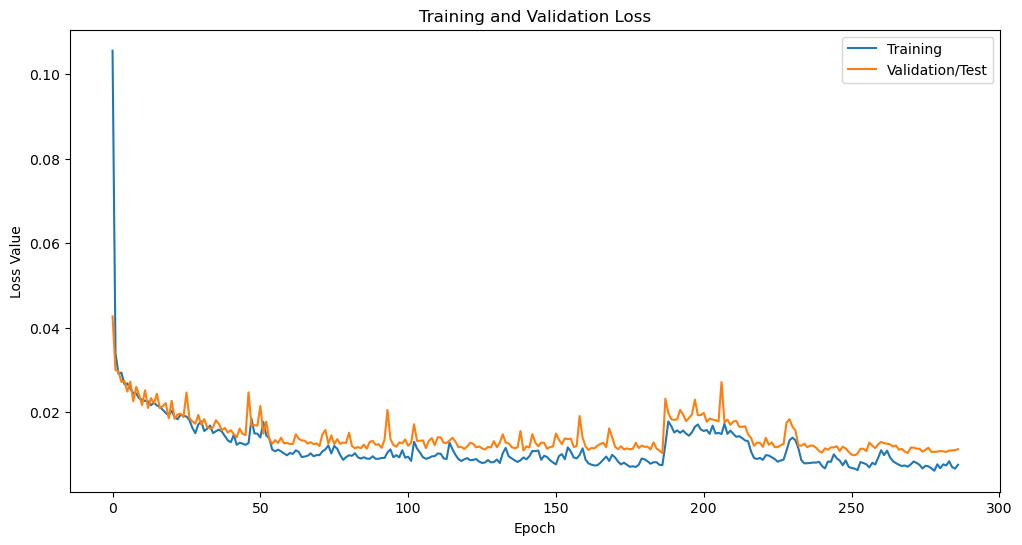

In [59]:
start=perf_counter()
# Crear el modelo
tf.random.set_seed(0)
base = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
base.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', patience=100, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_base = base.fit(df_train, y_test.iloc[:1000] , epochs=5000, validation_data=(df_test, y_test.iloc[1000:]), callbacks=[callback],)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

base.evaluate(df_test, y_test.iloc[1000:])

plt.figure(figsize=(12, 6))
plt.plot(history_model_base.history['loss'], label='Training')
plt.plot(history_model_base.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Resultados

In [93]:
autoencoder_base.evaluate(x_test, x_test)

63/63 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_percentage_error: 7.6938


[0.00528935668990016, 7.693831443786621]

In [96]:
base.evaluate(df_test, y_test.iloc[1000:])

32/32 [==============================] - 0s 6ms/step - loss: 0.0103 - mean_absolute_percentage_error: 9.8987


[0.010284130461513996, 9.898720741271973]

In [98]:
pred = base.predict(df_test)
rmse = np.sqrt(mean_squared_error(y_test.iloc[1000:], pred))
target_range = np.max(y_test.iloc[1000:]) - np.min(y_test.iloc[1000:])
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

32/32 [==============================] - 0s 5ms/step


89.182859033575298

# Model 2 con xy

In [62]:
x_train_2_xy

x         y
1000  0.281148  0.300330
1001  0.291104  0.307078
1002  0.299444  0.312622
1003  0.306378  0.317052
1004  0.312479  0.320964
...        ...       ...
4615  0.324964  0.324816
4616  0.325321  0.324396
4617  0.325849  0.324577
4618  0.327808  0.327013
4619  0.367730  0.251856

[3452 rows x 2 columns]

In [63]:
x_test_2_xy

x         y
0    0.253621  0.281669
1    0.217660  0.271921
2    0.423313  0.424928
3    0.391098  0.421873
4    0.211868  0.096718
..        ...       ...
995  0.183267  0.101314
996  0.420344  0.449864
997  0.155837  0.155880
998  0.158342  0.135341
999  0.290976  0.131249

[1000 rows x 2 columns]

In [64]:
# Definir el encoder
input_enc = keras.layers.Input(shape=(2,))
enc = keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal')(input_enc)
enc = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(enc)
encoder_2_xy = keras.models.Model(input_enc, enc)

# Definir el decoder
input_dec = keras.layers.Input(shape=(3,))
dec = keras.Sequential([
    keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(2)
])(input_dec)
decoder_2_xy = keras.models.Model(input_dec, dec)

# Construir el autoencoder
autoencoder_input = keras.layers.Input(shape=(2,))
encoded_repr = encoder_2_xy(autoencoder_input)
reconstructed = decoder_2_xy(encoded_repr)
autoencoder_2_xy = keras.models.Model(autoencoder_input, reconstructed)

# Compilar el autoencoder
autoencoder_2_xy.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError()]
)

# Entrenamiento del autoencoder
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
start = perf_counter()
history_2_xy = autoencoder_2_xy.fit(x_train_2_xy, x_train_2_xy, epochs=5000, validation_split=0.1, callbacks=[callback])
tl = (perf_counter() - start) / 60
print('Elapsed time: %.2f min.' % tl)

# Evaluar el autoencoder
autoencoder_2_xy.evaluate(x_test_2_xy, x_test_2_xy)

# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_2_xy.history['loss'], label='Training')
plt.plot(history_2_xy.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

Epoch 1/5000
98/98 [==============================] - 1s 10ms/step - loss: 0.0439 - mean_absolute_percentage_error: 27.0665 - val_loss: 2.7453e-04 - val_mean_absolute_percentage_error: 2.7912
Epoch 2/5000
98/98 [==============================] - 1s 7ms/step - loss: 4.4907e-04 - mean_absolute_percentage_error: 4.7670 - val_loss: 1.9975e-04 - val_mean_absolute_percentage_error: 3.4630
Epoch 3/5000
98/98 [==============================] - 1s 8ms/step - loss: 1.1983e-04 - mean_absolute_percentage_error: 2.4700 - val_loss: 3.1693e-04 - val_mean_absolute_percentage_error: 4.6167
Epoch 4/5000
98/98 [==============================] - 1s 9ms/step - loss: 9.1945e-05 - mean_absolute_percentage_error: 2.2512 - val_loss: 2.6610e-05 - val_mean_absolute_percentage_error: 1.2559
Epoch 5/5000
98/98 [==============================] - 1s 7ms/step - loss: 7.5345e-05 - mean_absolute_percentage_error: 1.9354 - val_loss: 6.8271e-05 - val_mean_absolute_percentage_error: 2.1630
Epoch 6/5000
98/98 [============

In [65]:
x_test_2_xy.shape

(1000, 2)

In [73]:
x_test_2_xy.iloc[500:].head(10)

x         y
500  0.399399  0.430037
501  0.275472  0.280096
502  0.158342  0.135341
503  0.399399  0.430037
504  0.366869  0.206580
505  0.205162  0.262231
506  0.290976  0.131249
507  0.201425  0.246490
508  0.245597  0.293368
509  0.269623  0.286947

In [74]:
y_test_2.iloc[500:].head(500)

D     H         T
500  0.31  0.35  1.000000
501  0.64  0.95  0.533333
502  0.37  0.65  0.466667
503  0.31  0.35  1.000000
504  0.37  0.45  0.333333
..    ...   ...       ...
995  0.37  0.60  0.400000
996  0.25  0.45  0.866667
997  0.37  0.65  0.333333
998  0.37  0.65  0.466667
999  0.37  0.50  0.333333

[500 rows x 3 columns]

In [66]:
train = x_test_2_xy.iloc[:500]
test = x_test_2_xy.iloc[500:]
train.shape, train.shape

((500, 2), (500, 2))

In [67]:
df_train = encoder_2_xy.predict(train)
df_test = encoder_2_xy.predict(test)

16/16 [==============================] - 0s 3ms/step


In [68]:
start=perf_counter()
# Crear el modelo
tf.random.set_seed(0)
model_2_xy = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_2_xy.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', patience=100, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_2_xy_2 = model_2_xy.fit(df_train, y_test_2.iloc[:500] , epochs=5000, validation_data=(df_test, y_test_2.iloc[500:]), callbacks=[callback],)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

model_2_xy.evaluate(df_test, y_test_2.iloc[500:])

plt.figure(figsize=(12, 6))
plt.plot(history_2_xy_2.history['loss'], label='Training')
plt.plot(history_2_xy_2.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

Epoch 1/5000
16/16 [==============================] - 1s 23ms/step - loss: 0.1405 - mean_absolute_percentage_error: 64.5250 - val_loss: 0.0520 - val_mean_absolute_percentage_error: 41.5070
Epoch 2/5000
16/16 [==============================] - 0s 16ms/step - loss: 0.0449 - mean_absolute_percentage_error: 38.1273 - val_loss: 0.0357 - val_mean_absolute_percentage_error: 29.3815
Epoch 3/5000
16/16 [==============================] - 0s 14ms/step - loss: 0.0357 - mean_absolute_percentage_error: 32.9645 - val_loss: 0.0344 - val_mean_absolute_percentage_error: 32.6257
Epoch 4/5000
16/16 [==============================] - 0s 12ms/step - loss: 0.0336 - mean_absolute_percentage_error: 32.7973 - val_loss: 0.0327 - val_mean_absolute_percentage_error: 30.6031
Epoch 5/5000
16/16 [==============================] - 0s 11ms/step - loss: 0.0318 - mean_absolute_percentage_error: 31.4607 - val_loss: 0.0311 - val_mean_absolute_percentage_error: 31.2022
Epoch 6/5000
16/16 [==============================] - 0

# Resultados

In [71]:
autoencoder_2_xy.evaluate(x_test_2_xy, x_test_2_xy)

32/32 [==============================] - 0s 8ms/step - loss: 1.0314e-05 - mean_absolute_percentage_error: 1.1021


[1.0313838174624834e-05, 1.1021167039871216]

In [72]:
model_2_xy.evaluate(df_test, y_test_2.iloc[500:])

16/16 [==============================] - 0s 9ms/step - loss: 0.0107 - mean_absolute_percentage_error: 11.6837


[0.010690765455365181, 11.683709144592285]

# Con rgb

Epoch 1/5000
98/98 [==============================] - 2s 11ms/step - loss: 0.0417 - mean_absolute_percentage_error: 17.3689 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 4.8779
Epoch 2/5000
98/98 [==============================] - 1s 7ms/step - loss: 0.0016 - mean_absolute_percentage_error: 4.6275 - val_loss: 9.7863e-04 - val_mean_absolute_percentage_error: 3.1095
Epoch 3/5000
98/98 [==============================] - 1s 8ms/step - loss: 0.0011 - mean_absolute_percentage_error: 3.8034 - val_loss: 5.3924e-04 - val_mean_absolute_percentage_error: 2.2652
Epoch 4/5000
98/98 [==============================] - 1s 9ms/step - loss: 0.0012 - mean_absolute_percentage_error: 4.3965 - val_loss: 8.1858e-04 - val_mean_absolute_percentage_error: 3.2757
Epoch 5/5000
98/98 [==============================] - 1s 9ms/step - loss: 3.4777e-04 - mean_absolute_percentage_error: 2.1360 - val_loss: 1.4786e-04 - val_mean_absolute_percentage_error: 1.5851
Epoch 6/5000
98/98 [============================

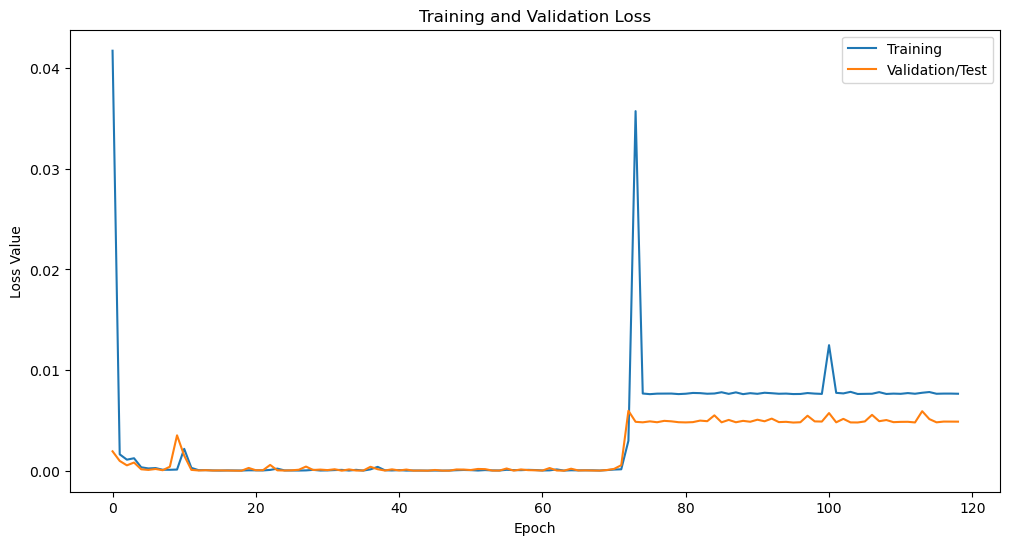

In [76]:
# Definir el encoder
input_enc = keras.layers.Input(shape=(3,))
enc = keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal')(input_enc)
enc = keras.Sequential([
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(enc)
encoder_2_rgb = keras.models.Model(input_enc, enc)

# Definir el decoder
input_dec = keras.layers.Input(shape=(3,))
dec = keras.Sequential([
    keras.layers.Dense(1024, activation='swish', kernel_initializer='he_normal'),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])(input_dec)
decoder_2_rgb = keras.models.Model(input_dec, dec)

# Construir el autoencoder
autoencoder_input = keras.layers.Input(shape=(3,))
encoded_repr = encoder_2_rgb(autoencoder_input)
reconstructed = decoder_2_rgb(encoded_repr)
autoencoder_2_rgb = keras.models.Model(autoencoder_input, reconstructed)

# Compilar el autoencoder
autoencoder_2_rgb.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError()]
)

# Entrenamiento del autoencoder
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
start = perf_counter()
history_2_rgb = autoencoder_2_rgb.fit(x_train_2_rgb, x_train_2_rgb, epochs=5000, validation_split=0.1, callbacks=[callback])
tl = (perf_counter() - start) / 60
print('Elapsed time: %.2f min.' % tl)

# Evaluar el autoencoder
autoencoder_2_rgb.evaluate(x_test_2_rgb, x_test_2_rgb)

# Graficar el "training loss" y el "validation loss"
plt.figure(figsize=(12, 6))
plt.plot(history_2_rgb.history['loss'], label='Training')
plt.plot(history_2_rgb.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [77]:
x_test_2_rgb.shape

(1000, 3)

In [78]:
train = x_test_2_rgb.iloc[:500]
test = x_test_2_rgb.iloc[500:]
train.shape, train.shape

((500, 3), (500, 3))

In [79]:
df_train = encoder_2_rgb.predict(train)
df_test = encoder_2_rgb.predict(test)

16/16 [==============================] - 0s 3ms/step


Epoch 1/5000
16/16 [==============================] - 1s 22ms/step - loss: 0.2229 - mean_absolute_percentage_error: 79.7716 - val_loss: 0.0478 - val_mean_absolute_percentage_error: 37.3200
Epoch 2/5000
16/16 [==============================] - 0s 15ms/step - loss: 0.0379 - mean_absolute_percentage_error: 32.0267 - val_loss: 0.0318 - val_mean_absolute_percentage_error: 24.7431
Epoch 3/5000
16/16 [==============================] - 0s 13ms/step - loss: 0.0267 - mean_absolute_percentage_error: 25.4206 - val_loss: 0.0237 - val_mean_absolute_percentage_error: 25.2596
Epoch 4/5000
16/16 [==============================] - 0s 11ms/step - loss: 0.0226 - mean_absolute_percentage_error: 23.5145 - val_loss: 0.0197 - val_mean_absolute_percentage_error: 22.2523
Epoch 5/5000
16/16 [==============================] - 0s 10ms/step - loss: 0.0212 - mean_absolute_percentage_error: 22.8920 - val_loss: 0.0205 - val_mean_absolute_percentage_error: 21.2727
Epoch 6/5000
16/16 [==============================] - 0

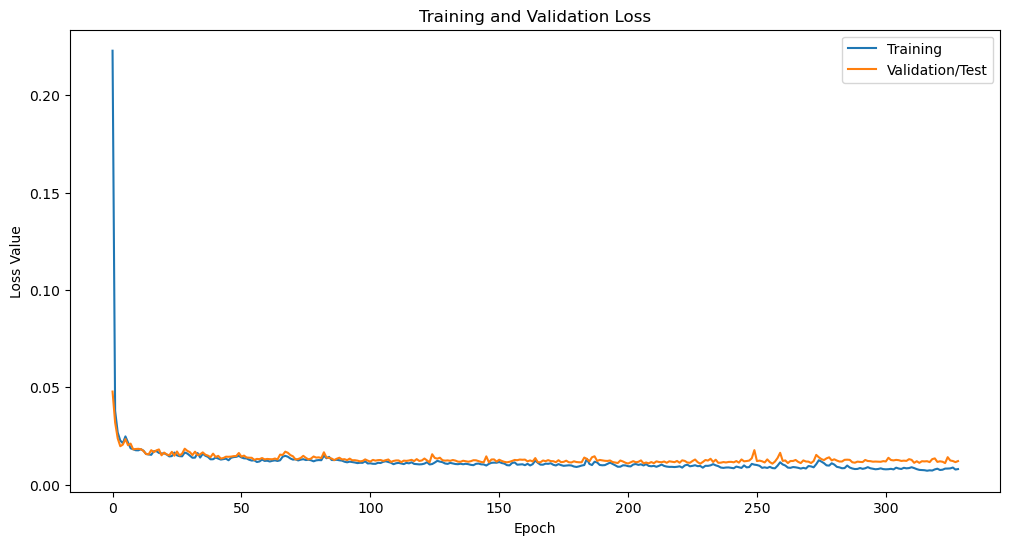

In [83]:
start=perf_counter()
# Crear el modelo
tf.random.set_seed(0)
model_2_rgb = keras.Sequential([
    keras.layers.Dense(1024, input_shape=(3,), activation='swish', kernel_initializer='he_normal', ),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(256, activation='linear', kernel_initializer='glorot_uniform'),
    keras.layers.Dense(128, activation='selu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='softsign', kernel_initializer='lecun_uniform'),
    keras.layers.Dense(3)
])


optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     rho=0.9,
#     momentum=0.5,
#     epsilon=1e-07,
#     centered=True,
#     weight_decay=0.0001,
)

# Compilación del modelo
model_2_rgb.compile(
    optimizer=optimizer,
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsolutePercentageError(),]
)

# Creacion de la funcion para detener el entrenamiento
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_percentage_error', patience=100, mode='min' ,restore_best_weights=True)
    
with tf.device('/device:GPU:0'):
    
# Entrenar el modelo y guardar el historial
    history_model_2_rgb = model_2_rgb.fit(df_train, y_test_2.iloc[:500] , epochs=5000, validation_data=(df_test, y_test_2.iloc[500:]), callbacks=[callback],)

tl=(perf_counter()-start)/60

print ('Elapsed time: %.2f min.' %tl)

model_2_rgb.evaluate(df_test, y_test_2.iloc[500:])

plt.figure(figsize=(12, 6))
plt.plot(history_model_2_rgb.history['loss'], label='Training')
plt.plot(history_model_2_rgb.history['val_loss'], label='Validation/Test')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Resultados

In [84]:
autoencoder_2_rgb.evaluate(x_test_2_rgb, x_test_2_rgb)

32/32 [==============================] - 0s 6ms/step - loss: 8.8970e-05 - mean_absolute_percentage_error: 1.2806


[8.896979124983773e-05, 1.2805850505828857]

In [85]:
model_2_rgb.evaluate(df_test, y_test_2.iloc[500:])

16/16 [==============================] - 0s 4ms/step - loss: 0.0107 - mean_absolute_percentage_error: 11.8942


[0.01069139689207077, 11.894203186035156]

In [87]:
model_2_rgb.evaluate(df_test, y_test_2.iloc[500:])

16/16 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_absolute_percentage_error: 11.8942


[0.01069139689207077, 11.894203186035156]

In [90]:
pred = model_2_rgb.predict(df_test)
rmse = np.sqrt(mean_squared_error(y_test_2.iloc[500:], pred))
target_range = np.max(y_test_2.iloc[500:]) - np.min(y_test_2.iloc[500:])
percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy

16/16 [==============================] - 0s 7ms/step


87.234666021939461